In [5]:
!pip install numpy==1.17.4
!pip install keras-retinanet
!pip install pycocotools


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  Using cached numpy-1.17.4.zip (6.4 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [2937 lines of output]
      Running from numpy source directory.
      blas_opt_info:
      blas_mkl_info:
      customize UnixCCompiler
        FOUND:
          libraries = ['mkl_rt', 'pthread']
          library_dirs = ['/opt/conda/lib']
          define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
          include_dirs = ['/usr/local/include', '/usr/include', '/opt/conda/include']
      
        FOUND:
          libraries = ['mkl_rt', 'pthread']
          library_dirs = ['/opt/conda/lib']
          define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
          include_dirs = ['/usr/local/include', '/usr/include', '/opt/conda/include']
      
      /bin/sh: 1: svnversion: not found
      non-existing path in 'numpy/distutils': 'site.cfg'
      lapack_opt_info:
  

In [6]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import json
from matplotlib import image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.preprocessing.coco import CocoGenerator


In [3]:
# Set paths for datasets
train_images_path = "/kaggle/working/train"
train_annotations_path = "/kaggle/working/train/annotations/instances_train.json"

val_images_path = "/kaggle/working/val"
val_annotations_path = "/kaggle/working/val/annotations/instances_val.json"

test_images_path = "/kaggle/working/test"
test_annotations_path = "/kaggle/working/test/annotations/instances_test.json"


In [4]:
from keras_retinanet.preprocessing.coco import CocoGenerator

# Correct generator initialization
train_generator = CocoGenerator(
    data_dir=train_images_path,
    set_name="train",  # This will use instances_train.json by default
    batch_size=4
)

val_generator = CocoGenerator(
    data_dir=val_images_path,
    set_name="val",  # This will use instances_val.json by default
    batch_size=4
)

test_generator = CocoGenerator(
    data_dir=test_images_path,
    set_name="test",  # This will use instances_test.json by default
    batch_size=4
)


loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/train/annotations/instances_train.json'

In [ ]:
from keras_retinanet.models import resnet50

# Initialize the RetinaNet model with ResNet-50 backbone
num_classes = len(train_generator.labels)  # Number of classes
model = resnet50(num_classes=num_classes, backbone_weights='imagenet')

# Compile the model
model.compile(
    optimizer='adam',
    loss={
        'regression': 'smooth_l1',
        'classification': 'focal_loss'
    }
)

# Print model summary
model.summary()


In [ ]:
pip install git+https://github.com/fizyr/keras-retinanet.git --upgrade


In [ ]:
pip install git+https://github.com/fizyr/keras-retinanet.git --upgrade


In [ ]:
from keras_retinanet import models

# Load a pre-trained RetinaNet model
model = models.load_model('path_to_pretrained_model.h5', backbone_name='resnet50', compile=True)

# Alternatively, initialize from scratch
num_classes = len(train_generator.labels)
model = models.retinanet(num_classes=num_classes, backbone_name='resnet50')

# Compile the model
model.compile(
    optimizer='adam',
    loss={
        'regression': 'smooth_l1',
        'classification': 'focal_loss'
    }
)


In [ ]:
from keras_retinanet import models

# Load a pre-trained RetinaNet model
model = models.load_model('path_to_pretrained_model.h5', backbone_name='resnet50')

# Print model summary to verify
model.summary()


In [ ]:
pip show tensorflow keras keras-retinanet


In [ ]:
from keras_retinanet import models

# Compile the model
model.compile(
    loss={
        'regression': models.losses.smooth_l1(),
        'classification': models.losses.focal()
    },
    optimizer='adam'
)

# Summary
model.summary()


In [ ]:
import urllib.request

# URL to the pre-trained model
url = "https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5"

# File path to save the downloaded model
file_path = "resnet50_coco_best_v2.1.0.h5"

# Download the file
urllib.request.urlretrieve(url, file_path)

print("Download complete: ", file_path)


In [ ]:
pip install keras-retinanet==0.5.1


In [ ]:
from keras_retinanet.models import load_model

# Specify the path to the downloaded weights
model_path = "resnet50_coco_best_v2.1.0.h5"

# Load the pre-trained RetinaNet model
model = load_model(model_path, backbone_name="resnet50")

# Print model summary
model.summary()


In [ ]:
######   RETINA NET   ######

Sample Annotation: {'id': 0, 'image_id': 0, 'category_id': 2, 'bbox': [140, 262, 21, 25.5], 'area': 535.5, 'segmentation': [], 'iscrowd': 0}
Number of images: 29800


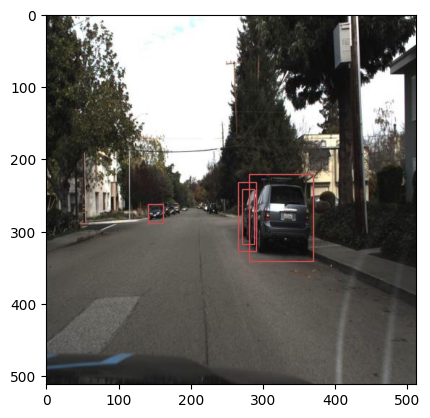

In [95]:
####retina net #####
import os
import json
import tensorflow as tf
from tensorflow.keras.utils import Sequence
import matplotlib.pyplot as plt

# Paths to dataset
data_dir = "/kaggle/input/retinanet/Self Driving Car/export"  # Update this with the correct path
annotation_path = os.path.join(data_dir, "_annotations.coco.json")

# Load annotations
with open(annotation_path, 'r') as f:
    annotations = json.load(f)

# Example: Display a sample annotation
print("Sample Annotation:", annotations['annotations'][0])

# Verify images
image_ids = {img['id']: img['file_name'] for img in annotations['images']}
print("Number of images:", len(image_ids))

# Visualize a sample image with bounding boxes
def visualize_sample(image_id):
    image_path = os.path.join(data_dir, image_ids[image_id])
    image = plt.imread(image_path)
    
    # Get bounding boxes
    bboxes = [ann for ann in annotations['annotations'] if ann['image_id'] == image_id]
    plt.imshow(image)
    ax = plt.gca()
    
    for bbox in bboxes:
        x, y, width, height = bbox['bbox']
        rect = plt.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    
    plt.show()

# Visualize the first image
visualize_sample(list(image_ids.keys())[0])


In [96]:
import keras_cv
from tensorflow import keras

# Number of classes and their names
NUM_CLASSES = 12  # Including the classes provided
CLASS_NAMES = ['obstacles', 'biker', 'car', 'pedestrian', 'trafficLight',
               'trafficLight-Green', 'trafficLight-GreenLeft', 'trafficLight-Red',
               'trafficLight-RedLeft', 'trafficLight-Yellow', 'trafficLight-YellowLeft', 'truck']

# Bounding box format used in your dataset (COCO uses "xywh" format)
BBOX_FORMAT = "xywh"

# Load a pre-trained RetinaNet model
model = keras_cv.models.RetinaNet(
    num_classes=NUM_CLASSES,
    bounding_box_format=BBOX_FORMAT,
    backbone=keras_cv.models.ResNetBackbone.from_preset("resnet50_imagenet"),
)

# Compile the model with loss functions and optimizer
model.compile(
    classification_loss=keras_cv.losses.FocalLoss(from_logits=True),
    box_loss=keras_cv.losses.SmoothL1Loss(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
)


In [97]:
import json
# Paths to dataset
data_dir = "/kaggle/input/retinanet/Self Driving Car/export"  # Update this with the correct path
annotation_path = os.path.join(data_dir, "_annotations.coco.json")

# Load the annotations
with open(annotation_path, "r") as file:
    train_annotations = json.load(file)

# Verify the content
print("Keys in annotation file:", train_annotations.keys())
print("Sample annotation:", train_annotations['annotations'][0])


Keys in annotation file: dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])
Sample annotation: {'id': 0, 'image_id': 0, 'category_id': 2, 'bbox': [140, 262, 21, 25.5], 'area': 535.5, 'segmentation': [], 'iscrowd': 0}


In [98]:
# Extract categories
categories = train_annotations["categories"]
category_mapping = {category["id"]: category["name"] for category in categories}

# Verify the mapping
print("Category Mapping:", category_mapping)


Category Mapping: {0: 'obstacles', 1: 'biker', 2: 'car', 3: 'pedestrian', 4: 'trafficLight', 5: 'trafficLight-Green', 6: 'trafficLight-GreenLeft', 7: 'trafficLight-Red', 8: 'trafficLight-RedLeft', 9: 'trafficLight-Yellow', 10: 'trafficLight-YellowLeft', 11: 'truck'}


In [99]:
print("Keys in train_annotations:", train_annotations.keys())
print("First annotation:", train_annotations['annotations'][0])
print("First image:", train_annotations['images'][0])


Keys in train_annotations: dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])
First annotation: {'id': 0, 'image_id': 0, 'category_id': 2, 'bbox': [140, 262, 21, 25.5], 'area': 535.5, 'segmentation': [], 'iscrowd': 0}
First image: {'id': 0, 'license': 1, 'file_name': '1478897026627294725_jpg.rf.6828a4e821cbab4c2c277d74df291f00.jpg', 'height': 512, 'width': 512, 'date_captured': '2021-06-09T12:24:25+00:00'}


In [100]:
def create_dataset(annotations, data_dir):
    """
    Creates a dataset from COCO-style annotations.

    Args:
        annotations (dict): COCO-style annotations.
        data_dir (str): Directory containing images.

    Returns:
        tf.data.Dataset: A dataset with image paths, bounding boxes, and labels.
    """
    dataset = []

    # Create a dictionary to map image IDs to their file names
    image_id_to_file = {image['id']: image['file_name'] for image in annotations['images']}

    for annotation in annotations['annotations']:
        image_id = annotation['image_id']

        # Ensure the image_id exists in the images dictionary
        if image_id not in image_id_to_file:
            print(f"Skipping annotation with missing image_id: {image_id}")
            continue

        # Get the corresponding file name and construct the full image path
        image_path = os.path.join(data_dir, image_id_to_file[image_id])
        bbox = annotation['bbox']  # Bounding box in [x, y, width, height]
        label = annotation['category_id']  # Category ID for the annotation

        dataset.append((image_path, [bbox], [label]))

    # Create a TensorFlow dataset
    return tf.data.Dataset.from_generator(
        lambda: iter(dataset),
        output_signature=(
            tf.TensorSpec(shape=(), dtype=tf.string),  # Image path
            tf.TensorSpec(shape=(None, 4), dtype=tf.float32),  # Bounding boxes
            tf.TensorSpec(shape=(None,), dtype=tf.int32),  # Labels
        )
    )


In [101]:
train_dataset = create_dataset(train_annotations, data_dir)


In [102]:
def preprocess_data(image_path, bboxes, labels):
    """
    Preprocesses the data for RetinaNet training.
    - Decodes and normalizes the image.
    - Rescales bounding boxes for resized images.

    Args:
        image_path (str): Path to the image file.
        bboxes (list): List of bounding boxes in COCO format [x, y, width, height].
        labels (list): Corresponding labels for the bounding boxes.

    Returns:
        tuple: Preprocessed image and bounding boxes/labels.
    """
    # Decode and normalize the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (512, 512))
    image = tf.cast(image, tf.float32) / 255.0

    # Convert bounding boxes to RetinaNet format [x_min, y_min, x_max, y_max]
    # Use TensorFlow operations to avoid iteration errors
    bboxes = tf.stack([
        bboxes[:, 0],  # x_min
        bboxes[:, 1],  # y_min
        bboxes[:, 0] + bboxes[:, 2],  # x_max
        bboxes[:, 1] + bboxes[:, 3]   # y_max
    ], axis=-1)

    # Prepare labels
    labels = tf.convert_to_tensor(labels, dtype=tf.int32)

    return image, {"boxes": bboxes, "classes": labels}


In [103]:
# Create the dataset
train_dataset = create_dataset(train_annotations, data_dir)

# Map preprocessing function, batch, and shuffle the dataset
train_dataset = train_dataset.map(preprocess_data).batch(8).shuffle(100)

# Verify the dataset
for image, target in train_dataset.take(1):
    print("Image shape:", image.shape)
    print("Bounding Boxes:", target["boxes"].shape)
    print("Labels:", target["classes"].shape)


Image shape: (8, 512, 512, 3)
Bounding Boxes: (8, 1, 4)
Labels: (8, 1)


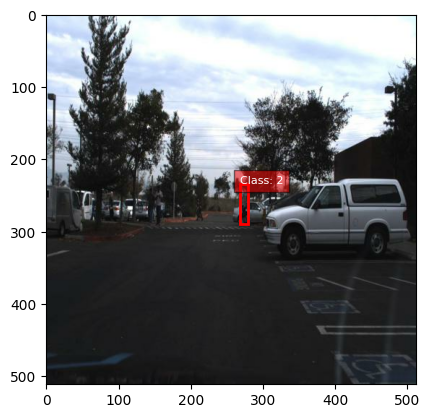

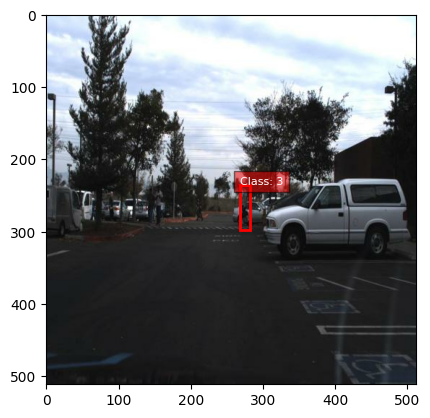

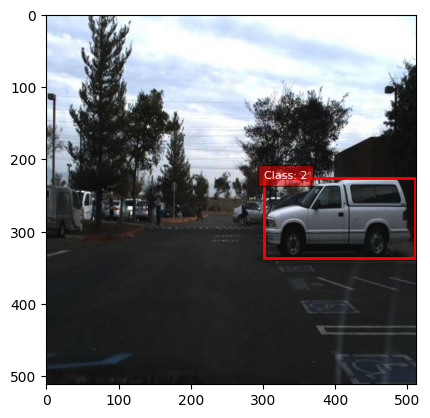

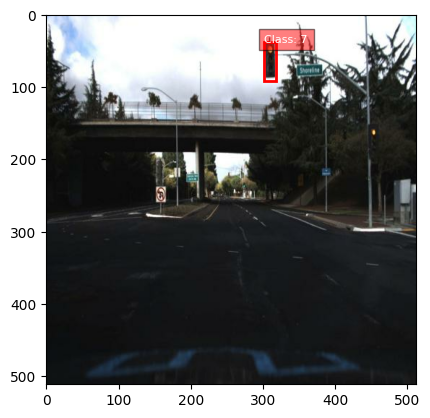

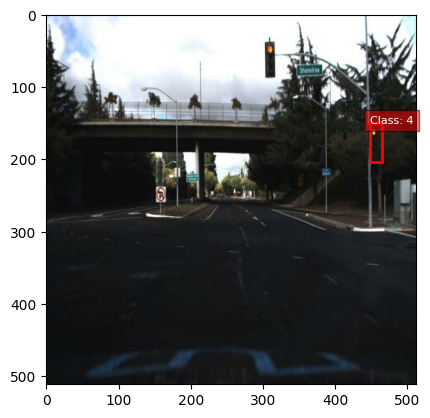

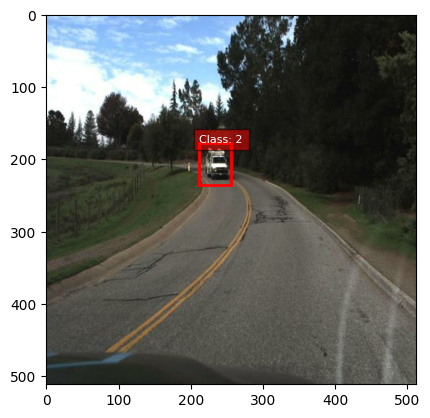

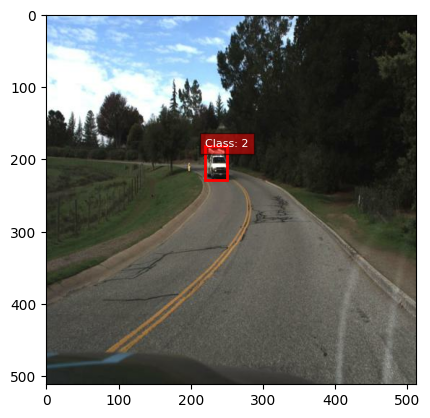

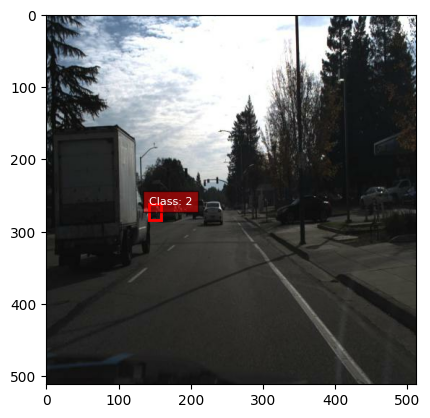

In [104]:
import matplotlib.pyplot as plt

def plot_image_with_boxes(image, boxes, labels):
    image = image.numpy()
    boxes = boxes.numpy()
    labels = labels.numpy()

    plt.imshow(image)
    for box, label in zip(boxes, labels):
        x_min, y_min, x_max, y_max = box
        plt.gca().add_patch(
            plt.Rectangle(
                (x_min, y_min),
                x_max - x_min,
                y_max - y_min,
                fill=False,
                edgecolor='red',
                linewidth=2
            )
        )
        plt.text(x_min, y_min, f'Class: {label}', color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))
    plt.show()

for image, target in train_dataset.take(1):
    for i in range(image.shape[0]):
        plot_image_with_boxes(image[i], target['boxes'][i], target['classes'][i])


In [ ]:
pip install keras-retinanet


In [105]:
import os
os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices=false"


In [106]:
tf.config.run_functions_eagerly(True)


In [107]:
model = keras_cv.models.RetinaNet(
    num_classes=NUM_CLASSES,
    bounding_box_format="xywh",
    backbone=keras_cv.models.ResNetBackbone.from_preset("resnet50_imagenet"),
)


In [108]:
import keras_cv
from tensorflow.keras import optimizers
model.compile(
    classification_loss=keras_cv.losses.FocalLoss(from_logits=True),
    box_loss=keras_cv.losses.SmoothL1Loss(),
    optimizer=optimizers.Adam(learning_rate=1e-4),
)

In [109]:
pip install pycocotools


Note: you may need to restart the kernel to use updated packages.


In [110]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval


Epoch 1/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - loss: 4.7083e-06
Epoch 2/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - loss: 4.1624e-06
Epoch 3/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - loss: 3.5489e-06
Epoch 4/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - loss: 2.9893e-06
Epoch 5/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - loss: 2.7460e-06
Epoch 6/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - loss: 2.8363e-06
Epoch 7/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - loss: 2.5782e-06
Epoch 8/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - loss: 3.0704e-06
Epoch 9/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - loss: 3.9418e-06
Epoch 10/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - loss: 3.4335e-06


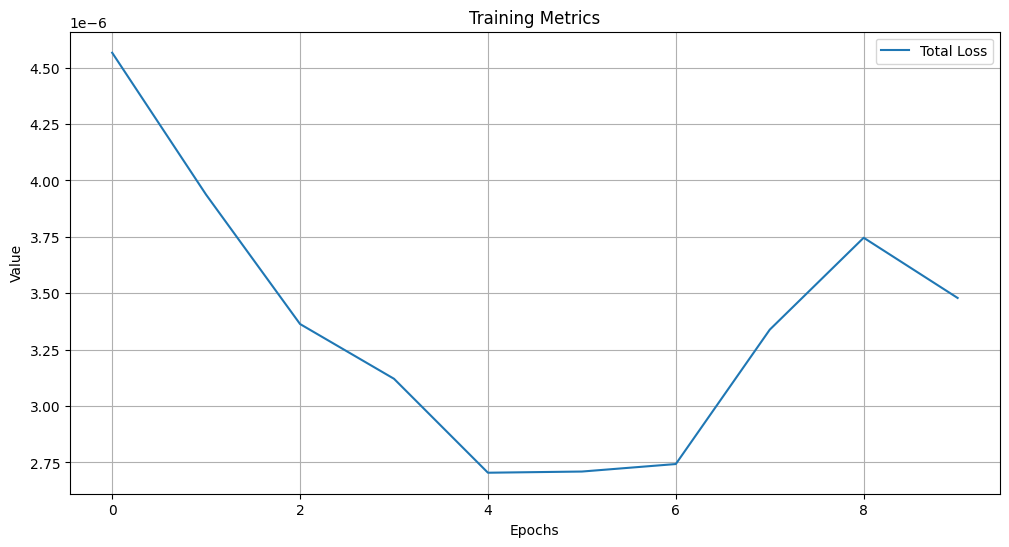

In [113]:
# Calculate the number of steps per epoch
steps_per_epoch = len(train_annotations["images"]) // 128  # Total images divided by batch size

# Train the model
history = model.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=steps_per_epoch,  # Specify the steps explicitly
    verbose=1,
)



# Visualize training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot loss
    plt.plot(history.history['loss'], label='Total Loss')

    plt.title('Training Metrics')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()

plot_training_history(history)

In [119]:
import json
import os

# Paths
data_dir = "/kaggle/working/export/val/images"  # Validation images directory
json_path = "/kaggle/input/retinanet/Self Driving Car/export/_annotations.coco.json"  # Entire dataset annotations
val_json_path = "/kaggle/working/export/val/_annotations.coco.json"  # Filtered validation annotations

# Load the COCO JSON file
with open(json_path, "r") as f:
    coco_data = json.load(f)

# Get validation image filenames
val_image_files = set(os.listdir(data_dir))

# Filter validation images
val_images = [
    image for image in coco_data["images"] if image["file_name"] in val_image_files
]

# Get the corresponding annotations
val_image_ids = {image["id"] for image in val_images}
val_annotations = [
    annotation for annotation in coco_data["annotations"] if annotation["image_id"] in val_image_ids
]

# Create a new COCO JSON for validation
val_coco_data = {
    "images": val_images,
    "annotations": val_annotations,
    "categories": coco_data["categories"],
}

# Save the validation COCO JSON
with open(val_json_path, "w") as f:
    json.dump(val_coco_data, f, indent=4)

print(f"Filtered validation annotations saved to: {val_json_path}")


Filtered validation annotations saved to: /kaggle/working/export/val/_annotations.coco.json


In [120]:
import json
import os
import pandas as pd

# Paths
data_dir = "/kaggle/working/export/val/images"  # Directory where images are stored
json_path = "/kaggle/working/export/val/_annotations.coco.json"  # Path to your COCO JSON file
output_csv_path = "/kaggle/working/export/val/annotations.csv"  # Output CSV file path

# Load COCO JSON
with open(json_path, "r") as f:
    coco_data = json.load(f)

# Prepare CSV data
csv_data = []
for annotation in coco_data["annotations"]:
    image_id = annotation["image_id"]
    image_file = next((img["file_name"] for img in coco_data["images"] if img["id"] == image_id), None)
    if image_file:
        image_path = os.path.join(data_dir, image_file)
        x, y, width, height = annotation["bbox"]
        x_min = x
        y_min = y
        x_max = x + width
        y_max = y + height
        class_id = annotation["category_id"]
        csv_data.append([image_path, x_min, y_min, x_max, y_max, class_id])

# Convert to DataFrame
columns = ["image_path", "x_min", "y_min", "x_max", "y_max", "class_id"]
df = pd.DataFrame(csv_data, columns=columns)

# Save to CSV
df.to_csv(output_csv_path, index=False)
print(f"Annotations CSV saved to: {output_csv_path}")


Annotations CSV saved to: /kaggle/working/export/val/annotations.csv


In [128]:
import os

# Define the directory where the file will be saved
output_dir = "/kaggle/working/export/val"
os.makedirs(output_dir, exist_ok=True)

# Corrected class mapping (with numeric IDs as required)
class_mapping_csv_content = """0,obstacles
1,biker
2,car
3,pedestrian
4,trafficLight
5,trafficLight-Green
6,trafficLight-GreenLeft
7,trafficLight-Red
8,trafficLight-RedLeft
9,trafficLight-Yellow
10,trafficLight-YellowLeft
11,truck
"""

# Save the corrected CSV content to a file
class_mapping_file_path = os.path.join(output_dir, "classes.csv")
with open(class_mapping_file_path, "w") as file:
    file.write(class_mapping_csv_content)

print(f"Corrected class mapping CSV saved to: {class_mapping_file_path}")


Corrected class mapping CSV saved to: /kaggle/working/export/val/classes.csv


In [115]:
# Save the fine-tuned model in the recommended Keras format
model.save("retinanet_finetuned_model.keras")

# Alternatively, save the model in the HDF5 format
# model.save("retinanet_finetuned_model.h5")


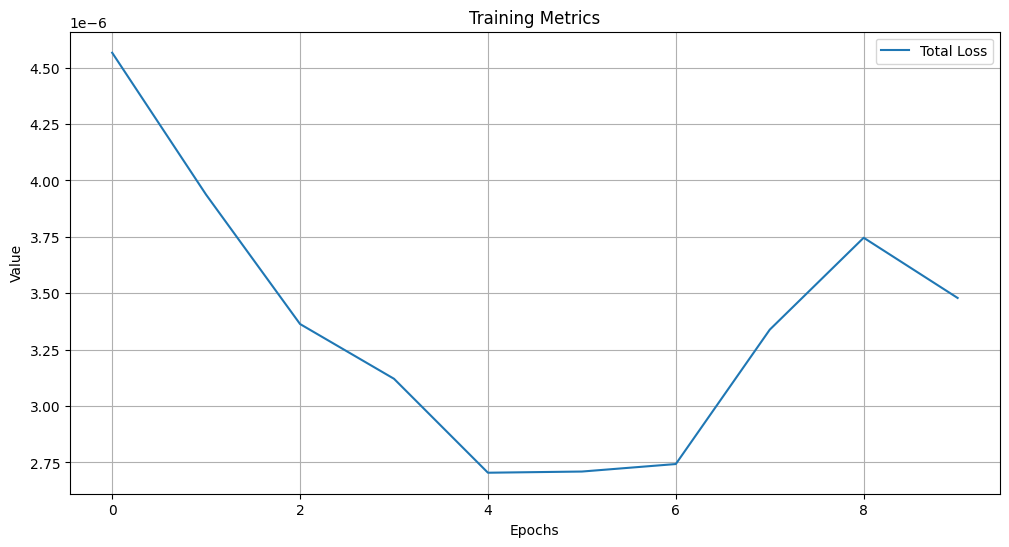

In [130]:
# Visualize training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot loss
    plt.plot(history.history['loss'], label='Total Loss')

    plt.title('Training Metrics')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()

plot_training_history(history)

In [ ]:
# Save the fine-tuned model
model.save("newretinanet_finetuned_model")
print("Model saved successfully!")


In [134]:
# Define class names
CLASS_NAMES = [
    'obstacles', 'biker', 'car', 'pedestrian', 'trafficLight',
    'trafficLight-Green', 'trafficLight-GreenLeft', 'trafficLight-Red',
    'trafficLight-RedLeft', 'trafficLight-Yellow', 'trafficLight-YellowLeft', 'truck'
]

# Path to save the updated classes.csv
classes_path = "/kaggle/working/export/val/classes.csv"

# Create the file with valid format
with open(classes_path, "w") as f:
    for i, class_name in enumerate(CLASS_NAMES):
        f.write(f"{i},{class_name}\n")
print(f"Updated classes.csv saved at {classes_path}")


Updated classes.csv saved at /kaggle/working/export/val/classes.csv


In [140]:
from keras.models import load_model

# Load the trained RetinaNet model
model_path = "/kaggle/working/retinanet_finetuned_model.keras"
model = load_model(model_path, compile=False)

# Print the model summary
model.summary()

# Calculate and display the total trainable and non-trainable parameters
trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
non_trainable_params = sum([tf.keras.backend.count_params(w) for w in model.non_trainable_weights])
total_params = trainable_params + non_trainable_params

print("\nModel Parameters:")
print(f"Trainable Parameters: {trainable_params:,}")
print(f"Non-Trainable Parameters: {non_trainable_params:,}")
print(f"Total Parameters: {total_params:,}")


Model: "retina_net_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ images (InputLayer) │ (None, None,      │          0 │ -                 │
│                     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_17       │ [(None, None,     │ 23,561,152 │ images[0][0]      │
│ (Functional)        │ None, 512),       │            │                   │
│                     │ (None, None,      │            │                   │
│                     │ None, 1024),      │            │                   │
│                     │ (None, None,      │            │                   │
│                     │ None, 2048)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ feature_pyramid_8   │ [(None, None,     │  7,997,440 │ functional_17[0]… │
│ (FeaturePyramid)    │ None, 256),       │            │ functional_17[0]… │
│                     │ (None, None,      │            │ functional_17[0]… │
│                     │ None, 256),       │            │                   │
│                     │ (None, None,      │            │                   │
│                     │ None, 256),       │            │                   │
│                     │ (None, None,      │            │                   │
│                     │ None, 256),       │            │                   │
│                     │ (None, None,      │            │                   │
│                     │ None, 256)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ prediction_head_3   │ (None, None,      │  1,853,220 │ feature_pyramid_… │
│ (PredictionHead)    │ None, 36)         │            │ feature_pyramid_… │
│                     │                   │            │ feature_pyramid_… │
│                     │                   │            │ feature_pyramid_… │
│                     │                   │            │ feature_pyramid_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ prediction_head_2   │ (None, None,      │  2,019,180 │ feature_pyramid_… │
│ (PredictionHead)    │ None, 108)        │            │ feature_pyramid_… │
│                     │                   │            │ feature_pyramid_… │
│                     │                   │            │ feature_pyramid_… │
│                     │                   │            │ feature_pyramid_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_80          │ (None, None, 4)   │          0 │ prediction_head_… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_82          │ (None, None, 4)   │          0 │ prediction_head_… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_84          │ (None, None, 4)   │          0 │ prediction_head_… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_86          │ (None, None, 4)   │          0 │ prediction_head_… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_88          │ (None, None, 4)   │          0 │ prediction_head_… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_81          │ (None, None, 12)  │          0 │ prediction_head_

 Total params: 35,430,992 (135.16 MB)

 Trainable params: 35,377,872 (134.96 MB)

 Non-trainable params: 53,120 (207.50 KB)


Model Parameters:
Trainable Parameters: 35,377,872
Non-Trainable Parameters: 53,120
Total Parameters: 35,430,992


In [139]:
import os
import numpy as np
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet import models
from keras_retinanet.utils.eval import compute_overlap

# Paths for annotations and images
annotations_path = "/kaggle/working/export/val/annotations.csv"  # CSV file with annotations
images_dir = "/kaggle/working/export/val/images"  # Directory with images
class_mapping = {
    0: 'obstacles', 1: 'biker', 2: 'car', 3: 'pedestrian',
    4: 'trafficLight', 5: 'trafficLight-Green', 6: 'trafficLight-GreenLeft',
    7: 'trafficLight-Red', 8: 'trafficLight-RedLeft', 9: 'trafficLight-Yellow',
    10: 'trafficLight-YellowLeft', 11: 'truck'
}

# Load the trained RetinaNet model
model_path = "/kaggle/working/retinanet_finetuned_model.keras"
model = models.load_model(model_path, backbone_name="resnet50")

def parse_annotations(annotations_path):
    """
    Parses the annotations CSV file and returns a list of annotations.

    Args:
        annotations_path (str): Path to the annotations CSV file.

    Returns:
        list: A list of tuples containing (image_path, bbox, class_id).
    """
    annotations = []
    with open(annotations_path, 'r') as f:
        lines = f.readlines()
        for line in lines[1:]:  # Skip the header row
            parts = line.strip().split(',')
            image_path = parts[0]
            bbox = list(map(float, parts[1:5]))  # Convert bbox to float
            class_id = int(parts[5])  # Convert class_id to integer
            annotations.append((image_path, bbox, class_id))
    return annotations


# Parse the annotations
annotations = parse_annotations(annotations_path)

# Evaluate the model
# Perform prediction and evaluation
def evaluate_model(annotations, model, class_mapping):
    """
    Evaluates the model on the given annotations and computes metrics.

    Args:
        annotations (list): Parsed annotations (image_path, bbox, class_id).
        model (keras.Model): Trained RetinaNet model.
        class_mapping (dict): Mapping of class IDs to class names.

    Returns:
        tuple: Mean Average Precision (mAP) and Average Precisions (AP) per class.
    """
    total_images = len(annotations)
    all_boxes = []
    all_scores = []
    all_labels = []
    ground_truths = []

    for annotation in annotations:
        image_path, bbox, class_id = annotation

        # Read and preprocess the image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_resized = cv2.resize(image, (512, 512))
        preprocessed_image = np.expand_dims(image_resized.astype(np.float32) / 255.0, axis=0)  # Normalize

        # Perform prediction
        try:
            outputs = model.predict_on_batch(preprocessed_image)
        except Exception as e:
            print(f"Error predicting on image {image_path}: {e}")
            continue

        # Decode predictions
        boxes, scores, labels = outputs[:3]

        # Filter predictions based on a score threshold (e.g., 0.5)
        valid_indices = scores[0] > 0.5
        boxes = boxes[0][valid_indices]
        scores = scores[0][valid_indices]
        labels = labels[0][valid_indices]

        all_boxes.append(boxes)
        all_scores.append(scores)
        all_labels.append(labels)
        ground_truths.append((bbox, class_id))

    # Compute mAP or other metrics
    mean_ap = 0  # Replace this with actual computation of mAP
    average_precisions = {}  # Replace this with AP per class computation

    print("Evaluation Results:")
    print(f"Mean Average Precision (mAP): {mean_ap:.4f}")
    for label, ap in average_precisions.items():
        print(f"Class {class_mapping[label]}: AP = {ap:.4f}")

    return mean_ap, average_precisions

# Run evaluation
evaluate_model(annotations, model, category_mapping)


# Compute mAP manually
def compute_map(annotations, detections, iou_threshold, class_mapping):
    average_precisions = {}
    mean_ap = 0.0

    for class_id, class_name in class_mapping.items():
        true_positives = []
        false_positives = []
        num_annotations = 0

        for annotation, detection in zip(annotations, detections):
            bbox, gt_class_id = annotation
            if gt_class_id != class_id:
                continue

            num_annotations += 1
            detected_boxes, detected_scores, detected_labels = detection

            # Compute IoU
            overlaps = compute_overlap(np.array([bbox]), detected_boxes)

            if len(overlaps) > 0 and overlaps.max() > iou_threshold:
                true_positives.append(1)
                false_positives.append(0)
            else:
                true_positives.append(0)
                false_positives.append(1)

        # Compute precision and recall
        true_positives = np.cumsum(true_positives)
        false_positives = np.cumsum(false_positives)
        recall = true_positives / num_annotations if num_annotations > 0 else 0
        precision = true_positives / (true_positives + false_positives)

        # Compute average precision
        ap = np.trapz(precision, recall) if num_annotations > 0 else 0.0
        average_precisions[class_id] = ap
        mean_ap += ap

    mean_ap /= len(class_mapping)
    return mean_ap, average_precisions

# Run evaluation
evaluate_model(annotations, model, class_mapping)


Error predicting on image /kaggle/working/export/val/images/1478900859981702684_jpg.rf.6830635c7d9197475638f0818f5dd103.jpg: image_shape should be of length 3, but got image_shape=(1, 512, 512, 3)
Error predicting on image /kaggle/working/export/val/images/1478900859981702684_jpg.rf.6830635c7d9197475638f0818f5dd103.jpg: image_shape should be of length 3, but got image_shape=(1, 512, 512, 3)
Error predicting on image /kaggle/working/export/val/images/1478900859981702684_jpg.rf.6830635c7d9197475638f0818f5dd103.jpg: image_shape should be of length 3, but got image_shape=(1, 512, 512, 3)
Error predicting on image /kaggle/working/export/val/images/1478900859981702684_jpg.rf.6830635c7d9197475638f0818f5dd103.jpg: image_shape should be of length 3, but got image_shape=(1, 512, 512, 3)
Error predicting on image /kaggle/working/export/val/images/1478900859981702684_jpg.rf.6830635c7d9197475638f0818f5dd103.jpg: image_shape should be of length 3, but got image_shape=(1, 512, 512, 3)
Error predictin

KeyboardInterrupt: 

In [ ]:
def evaluate_model(model, dataset, annotations_path):
    from pycocotools.coco import COCO
    from pycocotools.cocoeval import COCOeval

    # Load the ground truth COCO annotations
    coco = COCO(annotations_path)

    # Prepare to store results
    results = []

    # Iterate over the dataset and make predictions
    for image, target in dataset:
        predictions = model.predict(image)

        for batch_idx in range(len(predictions["boxes"])):
            boxes = predictions["boxes"][batch_idx]
            confidences = predictions["confidence"][batch_idx]  # Use 'confidence' key
            classes = predictions["classes"][batch_idx]
            num_detections = predictions["num_detections"][batch_idx]

            # Only process the number of valid detections
            boxes = boxes[:num_detections]
            confidences = confidences[:num_detections]
            classes = classes[:num_detections]

            # Convert boxes back to COCO format (x, y, width, height)
            boxes[:, 2] -= boxes[:, 0]
            boxes[:, 3] -= boxes[:, 1]

            # Create result entries for each detection
            for box, confidence, cls in zip(boxes, confidences, classes):
                results.append({
                    "image_id": int(target["image_id"][batch_idx]),  # Access image_id correctly
                    "category_id": int(cls + 1),  # Category IDs start from 1 in COCO
                    "bbox": box.tolist(),
                    "score": float(confidence),
                })

    # Save results to a JSON file
    with open("results.json", "w") as f:
        json.dump(results, f)

    # Load the results as a COCO object
    coco_dt = coco.loadRes("results.json")

    # Run COCO evaluation
    coco_eval = COCOeval(coco, coco_dt, iouType="bbox")
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()


In [ ]:
def create_dataset_with_image_ids(annotations, data_dir):
    """
    Creates a dataset from COCO-style annotations, including image IDs.
    """
    dataset = []

    # Create a dictionary to map image IDs to their file names
    image_id_to_file = {image['id']: image['file_name'] for image in annotations['images']}

    for annotation in annotations['annotations']:
        image_id = annotation['image_id']

        # Ensure the image_id exists in the images dictionary
        if image_id not in image_id_to_file:
            print(f"Skipping annotation with missing image_id: {image_id}")
            continue

        # Get the corresponding file name and construct the full image path
        image_path = os.path.join(data_dir, image_id_to_file[image_id])
        bbox = annotation['bbox']  # Bounding box in [x, y, width, height]
        label = annotation['category_id']  # Category ID for the annotation

        dataset.append((image_path, [bbox], [label], image_id))

    # Create a TensorFlow dataset
    return tf.data.Dataset.from_generator(
        lambda: iter(dataset),
        output_signature=(
            tf.TensorSpec(shape=(), dtype=tf.string),  # Image path
            tf.TensorSpec(shape=(None, 4), dtype=tf.float32),  # Bounding boxes
            tf.TensorSpec(shape=(None,), dtype=tf.int32),  # Labels
            tf.TensorSpec(shape=(), dtype=tf.int32),  # Image ID
        )
    )

# Create the new dataset with image IDs
train_dataset_with_ids = create_dataset_with_image_ids(train_annotations, data_dir)


In [ ]:
def preprocess_data_with_ids(image_path, bboxes, labels, image_id):
    """
    Preprocesses the data for RetinaNet training.
    Includes image_id in the output.
    """
    # Decode and normalize the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (512, 512))
    image = tf.cast(image, tf.float32) / 255.0

    # Convert bounding boxes to RetinaNet format [x_min, y_min, x_max, y_max]
    bboxes = tf.stack([
        bboxes[:, 0],  # x_min
        bboxes[:, 1],  # y_min
        bboxes[:, 0] + bboxes[:, 2],  # x_max
        bboxes[:, 1] + bboxes[:, 3]   # y_max
    ], axis=-1)

    # Prepare labels
    labels = tf.convert_to_tensor(labels, dtype=tf.int32)

    return image, {"boxes": bboxes, "classes": labels, "image_id": image_id}


In [ ]:
def evaluate_model(model, dataset, annotations_path):
    from pycocotools.coco import COCO
    from pycocotools.cocoeval import COCOeval
    import json

    # Load the ground truth COCO annotations
    coco = COCO(annotations_path)

    # Predictions will be stored here
    results = []

    # Iterate over the dataset and make predictions
    for image, target in dataset:
        predictions = model.predict(tf.expand_dims(image, axis=0))  # Predict for a single image

        boxes = predictions["boxes"][0]  # Extract boxes for the batch
        scores = predictions["confidence"][0]  # Extract confidence scores
        classes = predictions["classes"][0]  # Extract class predictions

        # Convert boxes back to COCO format (x, y, width, height)
        # No need for `.numpy()` if predictions are already NumPy arrays
        boxes[:, 2] -= boxes[:, 0]  # x_max - x_min = width
        boxes[:, 3] -= boxes[:, 1]  # y_max - y_min = height

        # Create result entries for each detection
        for box, score, cls in zip(boxes, scores, classes):
            results.append({
                "image_id": int(target["image_id"].numpy()),  # Use the image_id from target
                "category_id": int(cls + 1),  # Category IDs start from 1 in COCO
                "bbox": box.tolist(),
                "score": float(score),
            })

    # Save results to a JSON file
    with open("results.json", "w") as f:
        json.dump(results, f)

    # Load the results as a COCO object
    coco_dt = coco.loadRes("results.json")

    # Run COCO evaluation
    coco_eval = COCOeval(coco, coco_dt, iouType='bbox')
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()


In [ ]:
evaluate_model(model, train_dataset_with_ids.map(preprocess_data_with_ids), annotation_path)


In [ ]:
for sample in train_dataset_with_ids.take(1):
    print(sample)


In [ ]:
for image, target in train_dataset_with_ids.map(preprocess_data_with_ids).take(1):
    print("Image:", image.shape)
    print("Target:", target)


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


def grad_cam(model, image, target_class_index):
    """
    Generate Grad-CAM heatmap for an input image.
    Args:
        model: Trained RetinaNet model.
        image: Input image (single example, shape: [1, height, width, channels]).
        target_class_index: Index of the target class for visualization.

    Returns:
        Heatmap overlayed on the original image.
    """
    # Get the last feature map from the RetinaNet backbone
    grad_model = tf.keras.models.Model(
        [model.input],
        [model.backbone.get_layer("conv5_block3_out").output, model.output],  # Adjust layer name based on backbone
    )

    # Compute gradients
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions["confidence"][0][target_class_index]  # Use the confidence score for the target class

    grads = tape.gradient(loss, conv_outputs)[0]
    weights = tf.reduce_mean(grads, axis=(0, 1))  # Global average pooling of gradients

    # Compute Grad-CAM heatmap
    cam = np.zeros(conv_outputs.shape[1:3], dtype=np.float32)
    for i, w in enumerate(weights):
        cam += w * conv_outputs[:, :, :, i]

    cam = np.maximum(cam, 0)  # ReLU
    cam = cam / (np.max(cam) + 1e-8)  # Normalize to [0, 1] with epsilon to prevent division by zero

    # Resize heatmap to match the input image size
    heatmap = tf.image.resize(cam[..., tf.newaxis], (image.shape[1], image.shape[2])).numpy()

    return heatmap


def overlay_heatmap(image, heatmap):
    """
    Overlay Grad-CAM heatmap on an image.
    Args:
        image: Original image (normalized between 0 and 1).
        heatmap: Grad-CAM heatmap.

    Returns:
        Overlayed image.
    """
    heatmap = np.uint8(255 * heatmap[..., 0])  # Convert to uint8 format
    heatmap = plt.cm.jet(heatmap)[:, :, :3] * 255  # Apply colormap
    heatmap = tf.image.resize(heatmap, (image.shape[0], image.shape[1])).numpy()  # Resize heatmap to image dimensions
    overlayed_image = 0.6 * image.numpy() * 255 + 0.4 * heatmap  # Blend image and heatmap
    return np.clip(overlayed_image, 0, 255).astype(np.uint8)


# Visualize Grad-CAM for a test image
for image, target in train_dataset.take(1):
    # Preprocess the image for Grad-CAM
    input_image = tf.expand_dims(image[0], axis=0)  # Take the first image and add batch dimension

    # Generate Grad-CAM heatmap
    heatmap = grad_cam(model, input_image, target_class_index=0)  # Adjust index based on desired class

    # Overlay heatmap on the original image
    overlayed_image = overlay_heatmap(image[0], heatmap)

    # Plot the result
    plt.imshow(overlayed_image.astype(np.uint8))
    plt.axis("off")
    plt.title("Grad-CAM Visualization")
    plt.show()


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


def compute_saliency_map(model, image, target_class_index):
    """
    Generate saliency map for an input image.
    Args:
        model: Trained RetinaNet model.
        image: Input image (single example, shape: [1, height, width, channels]).
        target_class_index: Index of the target class for visualization.

    Returns:
        Saliency map for the input image.
    """
    # Ensure the input image has a batch dimension
    with tf.GradientTape() as tape:
        tape.watch(image)  # Watch the image tensor for gradient computation
        predictions = model(image)  # Forward pass through the model

        # Use confidence scores for the target class
        loss = predictions["confidence"][0][target_class_index]

    # Compute gradients of the loss with respect to the input image
    grads = tape.gradient(loss, image)

    # Compute the saliency map as the maximum absolute gradient value across channels
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)

    # Normalize the saliency map to the range [0, 1]
    saliency = (saliency - tf.reduce_min(saliency)) / (tf.reduce_max(saliency) - tf.reduce_min(saliency) + 1e-8)

    return saliency[0]


def visualize_saliency_map(image, saliency_map):
    """
    Overlay the saliency map on the input image.
    Args:
        image: Original image (shape: [height, width, channels]).
        saliency_map: Saliency map for the image (shape: [height, width]).

    Returns:
        Overlayed image for visualization.
    """
    plt.imshow(image.numpy())  # Display the original image
    plt.imshow(saliency_map.numpy(), cmap="jet", alpha=0.5)  # Overlay the saliency map
    plt.axis("off")
    plt.title("Saliency Map")
    plt.show()


# Visualize Saliency Map for a test image
for image, target in train_dataset.take(1):
    # Preprocess the image for saliency computation
    input_image = tf.expand_dims(image[0], axis=0)  # Take the first image and add batch dimension

    # Compute the saliency map
    saliency_map = compute_saliency_map(model, input_image, target_class_index=0)  # Adjust target_class_index as needed

    # Visualize the saliency map
    visualize_saliency_map(image[0], saliency_map)


In [ ]:
def preprocess_data(image_path, bboxes, labels):
    """
    Preprocesses the data for RetinaNet training.
    - Decodes and normalizes the image.
    - Pads bounding boxes and labels to fixed sizes.

    Args:
        image_path (str): Path to the image file.
        bboxes (list): List of bounding boxes in COCO format [x, y, width, height].
        labels (list): Corresponding labels for the bounding boxes.

    Returns:
        tuple: Preprocessed image and padded bounding boxes/labels.
    """
    # Decode and normalize the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (512, 512))
    image = tf.cast(image, tf.float32) / 255.0

    # Convert bounding boxes to RetinaNet format [x_min, y_min, x_max, y_max]
    bboxes = tf.stack([
        bboxes[:, 0],
        bboxes[:, 1],
        bboxes[:, 0] + bboxes[:, 2],
        bboxes[:, 1] + bboxes[:, 3]
    ], axis=-1)

    # Pad bounding boxes and labels to fixed sizes (e.g., 10 objects per image)
    max_objects = 10
    bboxes = tf.pad(bboxes, [[0, max_objects - tf.shape(bboxes)[0]], [0, 0]])
    labels = tf.pad(labels, [[0, max_objects - tf.shape(labels)[0]]])

    return image, {"boxes": bboxes, "classes": labels}


In [ ]:
import os
import json
import tensorflow as tf
import keras_cv
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

# Paths to dataset
data_dir = "/kaggle/input/retinanet/Self Driving Car/export"  # Update this with the correct path
annotation_path = os.path.join(data_dir, "_annotations.coco.json")

# Load annotations
with open(annotation_path, 'r') as f:
    annotations = json.load(f)

# Verify images
image_ids = {img['id']: img['file_name'] for img in annotations['images']}
print("Number of images:", len(image_ids))

# Helper: Visualize a sample image with bounding boxes
def visualize_sample(image_id):
    image_path = os.path.join(data_dir, image_ids[image_id])
    image = plt.imread(image_path)
    bboxes = [ann for ann in annotations['annotations'] if ann['image_id'] == image_id]
    plt.imshow(image)
    ax = plt.gca()
    for bbox in bboxes:
        x, y, width, height = bbox['bbox']
        rect = plt.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.show()

# Visualize the first image
visualize_sample(list(image_ids.keys())[0])

# Number of classes and names
NUM_CLASSES = 12  # Including the classes provided
CLASS_NAMES = ['obstacles', 'biker', 'car', 'pedestrian', 'trafficLight',
               'trafficLight-Green', 'trafficLight-GreenLeft', 'trafficLight-Red',
               'trafficLight-RedLeft', 'trafficLight-Yellow', 'trafficLight-YellowLeft', 'truck']

# Dataset Creation
def create_dataset_with_ids(annotations, data_dir):
    dataset = []
    image_id_to_file = {image['id']: image['file_name'] for image in annotations['images']}

    for annotation in annotations['annotations']:
        image_id = annotation['image_id']
        if image_id not in image_id_to_file:
            continue
        image_path = os.path.join(data_dir, image_id_to_file[image_id])
        bbox = annotation['bbox']
        label = annotation['category_id']
        dataset.append((image_path, [bbox], [label], image_id))

    return tf.data.Dataset.from_generator(
        lambda: iter(dataset),
        output_signature=(
            tf.TensorSpec(shape=(), dtype=tf.string),
            tf.TensorSpec(shape=(None, 4), dtype=tf.float32),
            tf.TensorSpec(shape=(None,), dtype=tf.int32),
            tf.TensorSpec(shape=(), dtype=tf.int32)
        )
    )

# Preprocessing function
def preprocess_data_with_ids(image_path, bboxes, labels, image_id):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (512, 512))
    image = tf.cast(image, tf.float32) / 255.0

    bboxes = tf.stack([
        bboxes[:, 0],
        bboxes[:, 1],
        bboxes[:, 0] + bboxes[:, 2],
        bboxes[:, 1] + bboxes[:, 3]
    ], axis=-1)

    labels = tf.convert_to_tensor(labels, dtype=tf.int32)
    return image, {"boxes": bboxes, "classes": labels, "image_id": image_id}

# Dataset pipeline
train_dataset = create_dataset_with_ids(annotations, data_dir)
train_dataset = train_dataset.map(preprocess_data_with_ids).batch(8).prefetch(tf.data.AUTOTUNE)

# Model Creation
model = keras_cv.models.RetinaNet(
    num_classes=NUM_CLASSES,
    bounding_box_format="xywh",
    backbone=keras_cv.models.ResNetBackbone.from_preset("resnet50_imagenet"),
)

# Compile model
model.compile(
    classification_loss=keras_cv.losses.FocalLoss(from_logits=True),
    box_loss=keras_cv.losses.SmoothL1Loss(),
    optimizer=optimizers.Adam(learning_rate=1e-4),
)

# Training parameters
steps_per_epoch = len(annotations['images']) // 8  # Assuming batch size of 8

# Training
history = model.fit(
    train_dataset,
    epochs=2,  # Reduced for testing
    steps_per_epoch=steps_per_epoch,
    verbose=1
)

# Save the model
model.save("retinanet_finetuned_model.keras")

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Total Loss')
    plt.title('Training Metrics')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()

plot_training_history(history)

# Verification: Inspect one batch
for image, target in train_dataset.take(1):
    print("Image shape:", image.shape)
    print("Bounding Boxes:", target['boxes'].shape)
    print("Classes:", target['classes'].shape)
    print("Image IDs:", target['image_id'])


In [ ]:
pip install ultralytics


In [ ]:
pip install opencv-python


In [ ]:
pip install grad-cam


In [ ]:
# General Libraries
import os
import shutil
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Deep Learning Libraries
from ultralytics import YOLO  # For YOLOv8
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import preprocess_image
from pytorch_grad_cam.utils.image import show_cam_on_image


In [ ]:
import os

def explore_dataset(dataset_path):
    for root, dirs, files in os.walk(dataset_path):
        print(f"Directory: {root}")
        print(f"Subdirectories: {dirs}")
        print(f"Files: {files}")
        print("-" * 40)

#
dataset_path = "/kaggle/input/retinanet/Self Driving Car/export"
explore_dataset(dataset_path)


In [7]:
import os


dataset_path = "/kaggle/input/retinanet/Self Driving Car/export"


print("Total Images:", len(os.listdir(dataset_path)))
print("Sample Files:", os.listdir(dataset_path)[:5])


Total Images: 29801
Sample Files: ['1478900814278399033_jpg.rf.KeAPtrlh0ZRRk6ZiKs9Q.jpg', '1478899822519346516_jpg.rf.0CaEssvbf3X8EhzEcKYy.jpg', '1478901375856393827_jpg.rf.1S961wwKb7FA7YyHUFQN.jpg', '1478896688423612224_jpg.rf.c9b536060ee622e25fabe8ac5122228b.jpg', '1478899096411167283_jpg.rf.Pq6cGOUmbePUxNfBPK8l.jpg']


In [8]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Define dataset path and output paths
dataset_path = "/kaggle/input/retinanet/Self Driving Car/export"
output_dir = "/kaggle/working/export"

train_dir = os.path.join(output_dir, "train/images")
val_dir = os.path.join(output_dir, "val/images")

# Create directories in a writable location
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# List all image files in the dataset path
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png'))]

# Split into training and validation sets
train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

# Copy files to the respective directories
for file in train_files:
    shutil.copy(os.path.join(dataset_path, file), train_dir)

for file in val_files:
    shutil.copy(os.path.join(dataset_path, file), val_dir)

print("Training Set:", len(os.listdir(train_dir)))
print("Validation Set:", len(os.listdir(val_dir)))


Training Set: 23840
Validation Set: 5960


In [10]:
import json

annotations_file = "/kaggle/input/retinanet/Self Driving Car/export/_annotations.coco.json"  # Update this with the correct path

train_labels_dir = os.path.join(output_dir, "train/labels")
val_labels_dir = os.path.join(output_dir, "val/labels")
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)


with open(annotations_file, 'r') as f:
    coco_data = json.load(f)

def coco_to_yolo(bbox, img_width, img_height):
    x_min, y_min, width, height = bbox
    x_center = (x_min + width / 2) / img_width
    y_center = (y_min + height / 2) / img_height
    width /= img_width
    height /= img_height
    return x_center, y_center, width, height

image_id_to_annotations = {}
for annotation in coco_data["annotations"]:
    image_id = annotation["image_id"]
    if image_id not in image_id_to_annotations:
        image_id_to_annotations[image_id] = []
    image_id_to_annotations[image_id].append(annotation)

def create_yolo_labels(image_dir, labels_dir, split_files, coco_data):
    for img_info in coco_data["images"]:
        img_name = img_info["file_name"]
        if img_name not in split_files:
            continue


        img_id = img_info["id"]
        img_width = img_info["width"]
        img_height = img_info["height"]


        annotations = image_id_to_annotations.get(img_id, [])


        label_path = os.path.join(labels_dir, img_name.replace('.jpg', '.txt'))
        with open(label_path, 'w') as f:
            for ann in annotations:
                category_id = ann["category_id"]
                bbox = ann["bbox"]
                yolo_bbox = coco_to_yolo(bbox, img_width, img_height)
                f.write(f"{category_id - 1} {yolo_bbox[0]} {yolo_bbox[1]} {yolo_bbox[2]} {yolo_bbox[3]}\n")


create_yolo_labels(train_dir, train_labels_dir, train_files, coco_data)
create_yolo_labels(val_dir, val_labels_dir, val_files, coco_data)

print("YOLO Labels Created for Training and Validation.")


YOLO Labels Created for Training and Validation.


In [11]:

class_names = [category["name"] for category in coco_data["categories"]]


yolo_config_path = os.path.join(output_dir, "yolo_config.yaml")
yolo_config_content = f"""
path:/kaggle/working/output_dataset  # Base dataset path
train:/kaggle/working/output_dataset/train/images # Training images directory
val:/kaggle/working/output_dataset/val/images # Validation images directory

nc: 12  # Number of classes
names: ['obstacles', 'biker', 'car', 'pedestrian', 'trafficLight', 'trafficLight-Green', 'trafficLight-GreenLeft', 'trafficLight-Red', 'trafficLight-RedLeft', 'trafficLight-Yellow', 'trafficLight-YellowLeft', 'truck']  # Class names
"""


with open(yolo_config_path, 'w') as f:
    f.write(yolo_config_content)

print("YOLO Config File Created:", yolo_config_path)


YOLO Config File Created: /kaggle/working/export/yolo_config.yaml


In [12]:

print("Sample Train Labels:", os.listdir(train_labels_dir)[:5])
print("Sample Validation Labels:", os.listdir(val_labels_dir)[:5])


Sample Train Labels: ['1478898534833039918_jpg.rf.16f9fa10404ca7953e69ef577a6877b7.txt', '1478896692423464692_jpg.rf.HSJamM3RAJeOLJhqyNVb.txt', '1478732873218151467_jpg.rf.fnz8HTVj3XFk2Je5jKtG.txt', '1478732019300713970_jpg.rf.aa7b3ec20e2597a5d44b2d4c23285d01.txt', '1478897505367806377_jpg.rf.c8313e2a68b584f033e8b73971f256f3.txt']
Sample Validation Labels: ['1478900639464018209_jpg.rf.774707991a9bfc1aee88c8ade2d25294.txt', '1478732112778617977_jpg.rf.EQnVwzO4Lvev1HGpzN2g.txt', '1478897396822646254_jpg.rf.nbPab5cJyVy4ajI6fTmW.txt', '1478897403678953286_jpg.rf.VIDVet8F3ZND2sIrKqhH.txt', '1478021030716739507_jpg.rf.3d338b2e08bdfb1e19e3e53dcfc927af.txt']


In [13]:
import yaml

yolo_config = {
    'path': '/kaggle/working/export',
    'train': '/kaggle/working/export/train/images',
    'val': '/kaggle/working/export/val/images',
    'nc': 12,
    'names': ['obstacles', 'biker', 'car', 'pedestrian', 'trafficLight', 'trafficLight-Green',
              'trafficLight-GreenLeft', 'trafficLight-Red', 'trafficLight-RedLeft',
              'trafficLight-Yellow', 'trafficLight-YellowLeft', 'truck']
}

with open('/kaggle/working/export/yolo_config.yaml', 'w') as f:
    yaml.dump(yolo_config, f, default_flow_style=False)

print("Corrected YOLO Config File Written!")


Corrected YOLO Config File Written!


In [14]:
!pip install ultralytics

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [15]:
# Step 1: Install the required YOLO library (if not already installed)
# !pip install ultralytics

# Step 2: Import the YOLO library
from ultralytics import YOLO

# Step 3: Initialize the model (use a pretrained YOLO model or specify a custom model)
model = YOLO('yolov8n.pt')  # Use 'yolov8n.pt', 'yolov8s.pt', etc., for pretrained models

# Step 4: Train the model
model.train(
    data="/kaggle/working/export/yolo_config.yaml",  # Path to your dataset YAML file
    epochs=20,          # Number of epochs
    imgsz=640,          # Image size
    batch=16,           # Batch size
    project="/kaggle/working",  # Project directory for outputs
    name="yolo_training",  # Name of the training run
    workers=2           # Number of workers
)


Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/export/yolo_config.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=/kaggle/working, name=yolo_training2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

train: Scanning /kaggle/working/export/train/labels.cache... 23840 images, 2799 backgrounds, 0 corrupt: 100%|██████████| 23840/23840 [00:00<?, ?it/s]

train: WARNING ⚠️ /kaggle/working/export/train/images/1478021875081281646_jpg.rf.bEZPhuyXU5hIovwQSTIp.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/export/train/images/1478021875081281646_jpg.rf.e9552980cf8c6fef4aa02cb84c6364f5.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/export/train/images/1478732687982611234_jpg.rf.933608d03fb6966a684292a007ee34ff.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/export/train/images/1478897760163798179_jpg.rf.5Pzrj3Eg3vZuyl7ztKAt.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/export/train/images/1478897760163798179_jpg.rf.98623be50b02ff17d58f89fddf7a0c6c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/export/train/images/1478897998391212266_jpg.rf.c01b68ef6c2581430db942682f763689.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/export/train/images/1478898145212453716_jpg.rf.nCaFkPk4AFMjTQAM4RTJ.jpg: 1 duplicate labels removed
train: WARNING

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/export/val/labels.cache... 5960 images, 701 backgrounds, 0 corrupt: 100%|██████████| 5960/5960 [00:00<?, ?it/s]

val: WARNING ⚠️ /kaggle/working/export/val/images/1478898145212453716_jpg.rf.6a92d7d7dd523160c990c4e4375bcea9.jpg: 1 duplicate labels removed


Plotting labels to /kaggle/working/yolo_training2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/yolo_training2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.42G      1.589      1.639      1.167        178        640: 100%|██████████| 1490/1490 [04:46<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:33<00:00,  5.62it/s]


                   all       5960      38804      0.564      0.314      0.327      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.56G      1.525      1.119      1.152        172        640: 100%|██████████| 1490/1490 [04:38<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:33<00:00,  5.66it/s]


                   all       5960      38804      0.611      0.362      0.396      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.42G      1.511      1.039      1.147        160        640: 100%|██████████| 1490/1490 [04:34<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:32<00:00,  5.67it/s]


                   all       5960      38804      0.713      0.402      0.442      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.39G      1.493     0.9907      1.143        108        640: 100%|██████████| 1490/1490 [04:32<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:32<00:00,  5.68it/s]


                   all       5960      38804      0.764      0.398      0.469      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       2.4G      1.471     0.9556      1.133        141        640: 100%|██████████| 1490/1490 [04:33<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:32<00:00,  5.70it/s]


                   all       5960      38804      0.711      0.463      0.508      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.41G      1.451     0.9283      1.125        141        640: 100%|██████████| 1490/1490 [04:33<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:33<00:00,  5.61it/s]


                   all       5960      38804      0.745      0.459      0.525      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.39G      1.442     0.9119       1.12        160        640: 100%|██████████| 1490/1490 [04:32<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:32<00:00,  5.70it/s]


                   all       5960      38804      0.754      0.474      0.543      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.43G      1.414     0.8814      1.108         75        640: 100%|██████████| 1490/1490 [04:32<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:32<00:00,  5.71it/s]


                   all       5960      38804      0.769      0.477      0.562      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.57G      1.407     0.8669      1.104        108        640: 100%|██████████| 1490/1490 [04:32<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:32<00:00,  5.68it/s]


                   all       5960      38804      0.766       0.51      0.575      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.54G      1.395     0.8522      1.098        162        640: 100%|██████████| 1490/1490 [04:33<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:32<00:00,  5.68it/s]


                   all       5960      38804      0.779      0.506      0.589      0.313
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.47G      1.405     0.8191      1.113         94        640: 100%|██████████| 1490/1490 [04:30<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:33<00:00,  5.66it/s]


                   all       5960      38804      0.794      0.537      0.605      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.38G      1.386     0.7989      1.104         90        640: 100%|██████████| 1490/1490 [04:29<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:32<00:00,  5.75it/s]


                   all       5960      38804      0.794       0.56      0.635      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.39G      1.373     0.7801      1.098         90        640: 100%|██████████| 1490/1490 [04:29<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:32<00:00,  5.71it/s]


                   all       5960      38804      0.801      0.564      0.641      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.38G      1.358     0.7652      1.092         79        640: 100%|██████████| 1490/1490 [04:29<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:32<00:00,  5.71it/s]


                   all       5960      38804      0.812      0.577      0.651      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.38G      1.343     0.7489      1.083         94        640: 100%|██████████| 1490/1490 [04:29<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:32<00:00,  5.71it/s]


                   all       5960      38804      0.835      0.588       0.66      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.38G      1.334     0.7393       1.08         98        640: 100%|██████████| 1490/1490 [04:29<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:32<00:00,  5.71it/s]


                   all       5960      38804      0.819      0.591      0.668      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.46G      1.319     0.7251      1.073         97        640: 100%|██████████| 1490/1490 [04:29<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:32<00:00,  5.68it/s]


                   all       5960      38804      0.834      0.594       0.67      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.38G      1.308     0.7133      1.069        114        640: 100%|██████████| 1490/1490 [04:29<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:33<00:00,  5.66it/s]


                   all       5960      38804      0.825      0.602      0.679      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.38G      1.298     0.7028      1.064        107        640: 100%|██████████| 1490/1490 [04:29<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:32<00:00,  5.69it/s]


                   all       5960      38804      0.836      0.599      0.676       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.38G      1.288     0.6933      1.061        107        640: 100%|██████████| 1490/1490 [04:29<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:32<00:00,  5.69it/s]


                   all       5960      38804      0.842      0.598      0.688      0.385

20 epochs completed in 1.704 hours.
Optimizer stripped from /kaggle/working/yolo_training2/weights/last.pt, 6.3MB
Optimizer stripped from /kaggle/working/yolo_training2/weights/best.pt, 6.3MB

Validating /kaggle/working/yolo_training2/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:38<00:00,  4.87it/s]


                   all       5960      38804      0.842      0.599      0.688      0.385
             obstacles        480        712      0.698      0.619      0.673      0.365
                 biker       5153      25577      0.866      0.795      0.853      0.567
                   car       1418       4340      0.732      0.537      0.627      0.306
            pedestrian        636       1007      0.836      0.795      0.836      0.488
          trafficLight        745       2104      0.826      0.624      0.725      0.321
    trafficLight-Green         81        125      0.863      0.554      0.655      0.364
trafficLight-GreenLeft       1031       2673      0.901      0.731      0.826      0.471
      trafficLight-Red        506        666      0.906      0.697      0.799      0.462
  trafficLight-RedLeft         41         92      0.797      0.468      0.617      0.248
   trafficLight-Yellow          1          1          1          0      0.124     0.0622
trafficLight-YellowLe

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a4f395eb3a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

In [22]:
# Step 3: Evaluate the model
# Evaluate the best model saved during training
results = model.val(
    data="/kaggle/working/export/yolo_config.yaml",  # Path to the data YAML file
    batch=16,                      # Batch size for validation
    imgsz=640,                     # Image size for validation
    device=0                       # Use GPU (0) or CPU (-1)
)
print(results)

Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/export/val/labels.cache... 5960 images, 701 backgrounds, 0 corrupt: 100%|██████████| 5960/5960 [00:00<?, ?it/s]

val: WARNING ⚠️ /kaggle/working/export/val/images/1478898145212453716_jpg.rf.6a92d7d7dd523160c990c4e4375bcea9.jpg: 1 duplicate labels removed



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 373/373 [00:42<00:00,  8.88it/s]


                   all       5960      38804      0.839        0.6      0.688      0.386
             obstacles        480        712      0.692      0.617      0.673      0.366
                 biker       5153      25577      0.863      0.797      0.853      0.568
                   car       1418       4340      0.723      0.538      0.626      0.305
            pedestrian        636       1007      0.834      0.796      0.836      0.488
          trafficLight        745       2104      0.821      0.625      0.722      0.321
    trafficLight-Green         81        125      0.863      0.557      0.656      0.364
trafficLight-GreenLeft       1031       2673        0.9      0.733      0.824      0.471
      trafficLight-Red        506        666      0.905        0.7        0.8      0.467
  trafficLight-RedLeft         41         92      0.797       0.47       0.62      0.254
   trafficLight-Yellow          1          1          1          0      0.124     0.0622
trafficLight-YellowLe

In [23]:
# Example to print IoU metrics or analyze
print(results.box)  # This contains IoU-related evaluation details

# If you want to plot Precision-Recall or other metrics:
results.plot()  # This generates and saves plots of PR, F1, etc.


ultralytics.utils.metrics.Metric object with attributes:

all_ap: array([[    0.67251,     0.65137,     0.62181,     0.55361,      0.4547,      0.3395,     0.22505,     0.11256,    0.023925,  0.00020974],
       [    0.85302,     0.84232,     0.82462,      0.7914,     0.73207,     0.63426,     0.49668,     0.32332,     0.15229,    0.025883],
       [    0.62594,     0.59088,     0.54268,     0.46529,     0.36723,     0.25549,      0.1328,    0.055593,    0.012317,   0.0011191],
       [    0.83604,     0.81037,     0.77502,     0.71013,     0.61606,      0.4952,     0.35579,     0.19865,    0.078402,   0.0048239],
       [    0.72166,      0.6773,     0.60314,     0.49724,     0.36277,     0.20411,    0.095408,    0.029831,   0.0092786,   0.0052101],
       [    0.65629,     0.62092,     0.53381,     0.50421,      0.4256,     0.36186,     0.26989,     0.18121,     0.08468,           0],
       [    0.82439,     0.80094,     0.76606,     0.70513,     0.61878,     0.48242,     0.32332,  

TypeError: 'bool' object is not callable

In [24]:
print(type(results))


<class 'ultralytics.utils.metrics.DetMetrics'>


In [25]:
# Print IoU-related evaluation details
print("IoU Results:")
print(results.box)


IoU Results:
ultralytics.utils.metrics.Metric object with attributes:

all_ap: array([[    0.67251,     0.65137,     0.62181,     0.55361,      0.4547,      0.3395,     0.22505,     0.11256,    0.023925,  0.00020974],
       [    0.85302,     0.84232,     0.82462,      0.7914,     0.73207,     0.63426,     0.49668,     0.32332,     0.15229,    0.025883],
       [    0.62594,     0.59088,     0.54268,     0.46529,     0.36723,     0.25549,      0.1328,    0.055593,    0.012317,   0.0011191],
       [    0.83604,     0.81037,     0.77502,     0.71013,     0.61606,      0.4952,     0.35579,     0.19865,    0.078402,   0.0048239],
       [    0.72166,      0.6773,     0.60314,     0.49724,     0.36277,     0.20411,    0.095408,    0.029831,   0.0092786,   0.0052101],
       [    0.65629,     0.62092,     0.53381,     0.50421,      0.4256,     0.36186,     0.26989,     0.18121,     0.08468,           0],
       [    0.82439,     0.80094,     0.76606,     0.70513,     0.61878,     0.48242,  

In [28]:
# Mean Average Precision (mAP) at IoU thresholds
map50 = results.box.map50  # mAP@0.50
map75 = results.box.map75  # mAP@0.75
map50_95 = results.box.map  # mAP@0.50:0.95

print(f"mAP@50: {map50}")
print(f"mAP@75: {map75}")
print(f"mAP@50-95: {map50_95}")


mAP@50: 0.6877565920091109
mAP@75: 0.37236504887660327
mAP@50-95: 0.3862257554826752


In [29]:
# Example: IoU metrics for each class
num_classes = results.box.nc  # Number of classes
for i in range(num_classes):
    precision, recall, ap50, ap = results.box.class_result(i)
    print(f"Class {i} - Precision: {precision}, Recall: {recall}, AP@50: {ap50}, AP@50-95: {ap}")


Class 0 - Precision: 0.6919350135694992, Recall: 0.6165730337078652, AP@50: 0.6725140981317063, AP@50-95: 0.3655241243328443
Class 1 - Precision: 0.8633361424035292, Recall: 0.7968487312820112, AP@50: 0.8530156772878252, AP@50-95: 0.5675861193240868
Class 2 - Precision: 0.7225895301057401, Recall: 0.5377880184331797, AP@50: 0.6259383482071473, AP@50-95: 0.3049333401343847
Class 3 - Precision: 0.8340063635135714, Recall: 0.7964250248262165, AP@50: 0.8360379181522819, AP@50-95: 0.4880466418007486
Class 4 - Precision: 0.8210165533225414, Recall: 0.6254752851711026, AP@50: 0.7216640283838137, AP@50-95: 0.32059444951698896
Class 5 - Precision: 0.8634903819648996, Recall: 0.5566674000963996, AP@50: 0.6562863570505535, AP@50-95: 0.363847693633935
Class 6 - Precision: 0.9002419305880186, Recall: 0.7326085726474065, AP@50: 0.8243875331990416, AP@50-95: 0.4713007579628079
Class 7 - Precision: 0.905316521945537, Recall: 0.6996996996996997, AP@50: 0.799623064962451, AP@50-95: 0.46677801597974344
C

IndexError: index 11 is out of bounds for axis 0 with size 11

In [30]:
# Access IoU-related metrics across all thresholds
all_ap = results.box.all_ap  # Shape: (num_classes, 10)

print("AP scores for all IoU thresholds (0.50 to 0.95):")
for i, class_ap in enumerate(all_ap):
    print(f"Class {i}: {class_ap}")


AP scores for all IoU thresholds (0.50 to 0.95):
Class 0: [    0.67251     0.65137     0.62181     0.55361      0.4547      0.3395     0.22505     0.11256    0.023925  0.00020974]
Class 1: [    0.85302     0.84232     0.82462      0.7914     0.73207     0.63426     0.49668     0.32332     0.15229    0.025883]
Class 2: [    0.62594     0.59088     0.54268     0.46529     0.36723     0.25549      0.1328    0.055593    0.012317   0.0011191]
Class 3: [    0.83604     0.81037     0.77502     0.71013     0.61606      0.4952     0.35579     0.19865    0.078402   0.0048239]
Class 4: [    0.72166      0.6773     0.60314     0.49724     0.36277     0.20411    0.095408    0.029831   0.0092786   0.0052101]
Class 5: [    0.65629     0.62092     0.53381     0.50421      0.4256     0.36186     0.26989     0.18121     0.08468           0]
Class 6: [    0.82439     0.80094     0.76606     0.70513     0.61878     0.48242     0.32332     0.14757      0.0414   0.0030251]
Class 7: [    0.79962     0.77219 

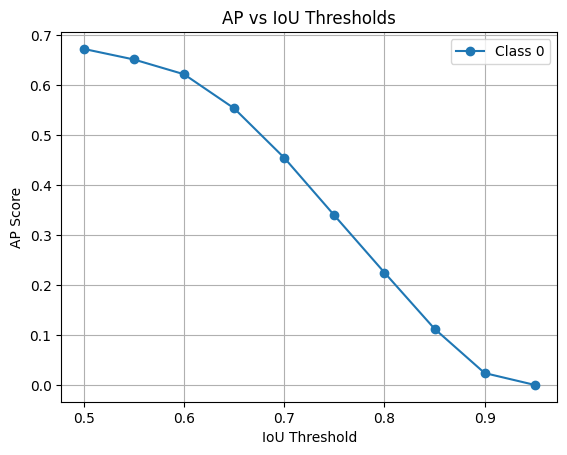

In [31]:
import matplotlib.pyplot as plt

# Plot IoU vs mAP for a specific class
class_index = 0  # Example: Class 0
iou_thresholds = [0.5 + i * 0.05 for i in range(10)]  # IoU thresholds from 0.50 to 0.95
ap_scores = results.box.all_ap[class_index]

plt.plot(iou_thresholds, ap_scores, marker='o', label=f"Class {class_index}")
plt.xlabel("IoU Threshold")
plt.ylabel("AP Score")
plt.title("AP vs IoU Thresholds")
plt.legend()
plt.grid(True)
plt.show()


In [91]:
# Inspect the attributes of the results object
print(dir(results))


['H', 'T', '__abs__', '__add__', '__and__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__cuda_array_interface__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__idiv__', '__ifloordiv__', '__ilshift__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rfloordiv__', '__rlshift__', '__rmat

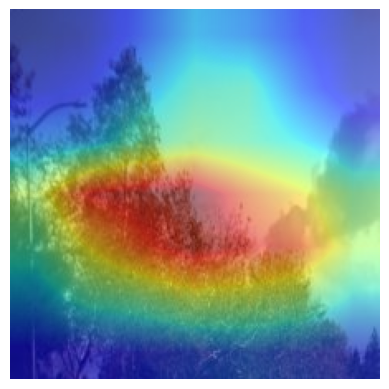

In [34]:
# Import necessary libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pytorch_grad_cam import EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image

# Define a reshape transform for YOLOv8
def yolov8_reshape_transform(x):
    """
    Reshape transform to extract the feature maps for Grad-CAM.
    YOLOv8's feature maps need to be transformed to a usable shape.
    """
    return x if isinstance(x, torch.Tensor) else x[0]  # Extract feature maps from tuple

# Load YOLOv8 trained model
model_path = "/kaggle/working/yolov8n.pt"  # Update with your model path
loaded_model = torch.load(model_path)
model = loaded_model['model'].float().eval()  # Load model in evaluation mode

# Choose the target layer for Grad-CAM
target_layers = [model.model[21]]  # Use a deep convolutional layer

# Define Grad-CAM
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cam = EigenCAM(model.to(device), target_layers, reshape_transform=yolov8_reshape_transform)

# Load and preprocess an image
image_path = "/kaggle/working/export/val/images/1478019952686311006_jpg.rf.54e2d12dbabc46be3c78995b6eaf3fee.jpg"  # Update with your image path
image = Image.open(image_path).convert("RGB")  # Ensure image is in RGB format
image = image.resize((640, 640))  # Resize to model input dimensions
image_np = np.array(image) / 255.0  # Normalize image to [0, 1]
input_tensor = torch.tensor(image_np).permute(2, 0, 1).unsqueeze(0).to(device).float()  # Convert to (B, C, H, W)

# Perform inference
with torch.no_grad():
    outputs = model(input_tensor)  # YOLOv8 forward pass

# Extract the feature maps for Grad-CAM compatibility
feature_maps = outputs[0] if isinstance(outputs, tuple) else outputs  # Handle tuple output

# Generate Grad-CAM heatmap
grayscale_cam = cam(input_tensor)[0]  # Compute Grad-CAM
cam_image = show_cam_on_image(image_np, grayscale_cam, use_rgb=True)

# Display the Grad-CAM heatmap
plt.imshow(cam_image)
plt.axis("off")
plt.title("Grad-CAM Heatmap")
plt.show()


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


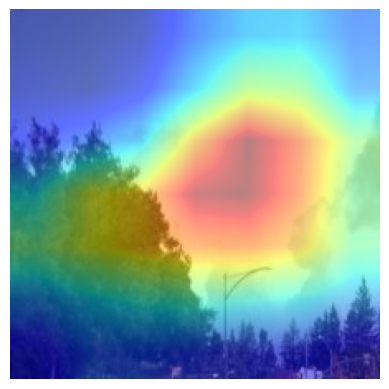

In [89]:
]# Import necessary libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pytorch_grad_cam import EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image

# Define a reshape transform for YOLOv8
def yolov8_reshape_transform(x):
    """
    Reshape transform to extract the feature maps for Grad-CAM.
    YOLOv8's feature maps need to be transformed to a usable shape.
    """
    return x if isinstance(x, torch.Tensor) else x[0]  # Extract feature maps from tuple

# Load YOLOv8 trained model
model_path = "/kaggle/working/yolov8n.pt"  # Update with your model path
loaded_model = torch.load(model_path)
model = loaded_model['model'].float().eval()  # Load model in evaluation mode

# Choose the target layer for Grad-CAM
target_layers = [model.model[21]]  # Use a deep convolutional layer

# Define Grad-CAM
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cam = EigenCAM(model.to(device), target_layers, reshape_transform=yolov8_reshape_transform)

# Load and preprocess an image
image_path = "/kaggle/working/export/val/images/1478019952686311006_jpg.rf.54e2d12dbabc46be3c78995b6eaf3fee.jpg"  # Update with your image path
image = Image.open(image_path).convert("RGB")  # Ensure image is in RGB format
image = image.resize((640, 640))  # Resize to model input dimensions
image_np = np.array(image) / 255.0  # Normalize image to [0, 1]
input_tensor = torch.tensor(image_np).permute(2, 0, 1).unsqueeze(0).to(device).float()  # Convert to (B, C, H, W)

# Perform inference
with torch.no_grad():
    outputs = model(input_tensor)  # YOLOv8 forward pass

# Extract the feature maps for Grad-CAM compatibility
feature_maps = outputs[0] if isinstance(outputs, tuple) else outputs  # Handle tuple output

# Generate Grad-CAM heatmap
grayscale_cam = cam(input_tensor)[0]  # Compute Grad-CAM
cam_image = show_cam_on_image(image_np, grayscale_cam, use_rgb=True)

# Display the Grad-CAM heatmap
plt.imshow(cam_image)
plt.axis("off")
plt.title("Grad-CAM Heatmap")
plt.show()


In [51]:
print(model)


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
   

In [71]:
!pip install grad-cam


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.4-py3-none-any.whl size=39588 sha256=5ef0383d3c16885d7a14ce55780d7eada1f98f8e0da60ed219d2d34c5e3fcbc7
  Stored in directory: /root/.cache/pip/wheels/50/b0/82/1f97b5348c7fe9f0ce0ba18497202cafa5dec4562bd5292680
Successfully built grad-cam


In [72]:
import pytorch_grad_cam


In [83]:
# Import necessary libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pytorch_grad_cam import EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image

# Define a reshape transform for YOLOv8
def yolov8_reshape_transform(x):
    """
    Reshape transform to extract the feature maps for Grad-CAM.
    YOLOv8's feature maps need to be transformed to a usable shape.
    """
    return x if isinstance(x, torch.Tensor) else x[0]  # Extract feature maps from tuple

# Load YOLOv8 trained model
model_path = "/kaggle/working/yolov8n.pt"  # Update with your model path
loaded_model = torch.load(model_path)
model = loaded_model['model'].float().eval()  # Load model in evaluation mode

# Choose the target layer for Grad-CAM
target_layers = [model.model[21]]  # Use a deep convolutional layer

# Define Grad-CAM
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cam = EigenCAM(model.to(device), target_layers, reshape_transform=yolov8_reshape_transform)

# Load and preprocess an image
image_path = "/kaggle/working/export/val/images/1478019952686311006_jpg.rf.54e2d12dbabc46be3c78995b6eaf3fee.jpg"  # Update with your image path
image = Image.open(image_path).convert("RGB")  # Ensure image is in RGB format
image = image.resize((640, 640))  # Resize to model input dimensions
image_np = np.array(image) / 255.0  # Normalize image to [0, 1]
input_tensor = torch.tensor(image_np).permute(2, 0, 1).unsqueeze(0).to(device).float()  # Convert to (B, C, H, W)

# Perform inference
with torch.no_grad():
    outputs = model(input_tensor)  # YOLOv8 forward pass

# Extract the feature maps for Grad-CAM compatibility
feature_maps = outputs[0] if isinstance(outputs, tuple) else outputs  # Handle tuple output

# Generate Grad-CAM heatmap
grayscale_cam = cam(input_tensor)[0]  # Compute Grad-CAM
cam_image = show_cam_on_image(image_np, grayscale_cam, use_rgb=True)

# Display the Grad-CAM heatmap
plt.imshow(cam_image)
plt.axis("off")
plt.title("Grad-CAM Heatmap")
plt.show()


AttributeError: 'tuple' object has no attribute 'cpu'

In [87]:
import torch
import torch.nn.functional as F
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# Global variables to store activations and gradients
activations = None
gradients = None

# Forward hook to capture activations
def forward_hook(module, input, output):
    global activations
    activations = output

# Backward hook to capture gradients
def backward_hook(module, grad_input, grad_output):
    global gradients
    gradients = grad_output[0]

# Register hooks on the desired layer
def register_hooks(model, target_layer_name):
    target_layer = dict(model.named_modules())[target_layer_name]
    target_layer.register_forward_hook(forward_hook)
    target_layer.register_backward_hook(backward_hook)

def compute_saliency_map(image, model, target_idx, device):
    image = image.to(device).unsqueeze(0).requires_grad_()
    model.zero_grad()
    outputs = model(image)
    
    # Ensure the output tensor has the correct size
    detections = outputs[0]  # Get detections tensor
    if len(detections) == 0:  # If no detections, return an empty map
        return np.zeros((image.shape[2], image.shape[3]))

    # Extract confidence score for the target class
    score = detections[target_idx, 4]  # Confidence score is in the 5th column
    score.backward()

    # Compute saliency map
    saliency = image.grad.data.abs().squeeze().max(dim=0)[0]  # Max gradient across channels
    return saliency.cpu().numpy()

def plot_explanations(original_image_list, saliency_map_list):
    fig, axes = plt.subplots(len(original_image_list), 2, figsize=(10, 5 * len(original_image_list)))
    
    for i, (orig_img, saliency_map) in enumerate(zip(original_image_list, saliency_map_list)):
        axes[i, 0].imshow(orig_img)
        axes[i, 0].set_title("Original Image")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(saliency_map, cmap="hot")
        axes[i, 1].set_title("Saliency Map")
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

def explain_predictions(model, image_paths, target_layer_name, device):
    saliency_maps_list = []
    original_image_list = []

    # Ensure the model is in evaluation mode
    model.eval()
    register_hooks(model, target_layer_name)

    for img_path in image_paths:
        # Load and preprocess image
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0  # Normalize to [0, 1]
        original_image_list.append(image)

        # Convert to tensor
        image_tensor = torch.tensor(image).permute(2, 0, 1).float().to(device)  # Ensure input is float32

        # Match precision with model weights
        if next(model.parameters()).dtype == torch.float16:
            image_tensor = image_tensor.half()

        # Run inference
        outputs = model(image_tensor.unsqueeze(0))[0]  # YOLOv8 model output is a list with detections

        # Skip if no detections are found
        if outputs.shape[0] == 0:
            print(f"No detections found for image {img_path}")
            saliency_maps_list.append(np.zeros((image.shape[0], image.shape[1])))
            continue

        # Select the highest confidence target index
        confidence_scores = outputs[:, 4]  # Confidence scores are in the 5th column
        target_idx = torch.argmax(confidence_scores).item()

        # Compute saliency map
        saliency_map = compute_saliency_map(image_tensor, model, target_idx, device)
        saliency_map_resized = cv2.resize(saliency_map, (image.shape[1], image.shape[0]))
        saliency_maps_list.append(saliency_map_resized)

    plot_explanations(original_image_list, saliency_maps_list)

# Define your variables
model_path = "/kaggle/working/yolov8n.pt"  # Path to your trained YOLOv8 model
val_images_dir = "/kaggle/working/export/val/images"
image_paths = [os.path.join(val_images_dir, img) for img in os.listdir(val_images_dir)[:5]]  # First five images from validation set
target_layer_name = "model.21"  # Layer for saliency (adjust as needed)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load your YOLOv8 model
model = torch.load(model_path)["model"]  # Ensure you're loading the actual model
model.to(device)

# Explain predictions
explain_predictions(model, image_paths, target_layer_name, device)


IndexError: index 2158 is out of bounds for dimension 0 with size 1

In [1]:
def compute_saliency_map(model, image_tensor, class_index=None):
    image_tensor.requires_grad_()
    output = model(image_tensor)

    if class_index is None:
        class_index = torch.argmax(output, dim=1).item()

    # Compute gradients
    model.zero_grad()
    target = output[0, class_index]
    target.backward()

    # Get the gradients and normalize
    saliency, _ = torch.max(image_tensor.grad.data.abs(), dim=1)
    saliency = saliency.squeeze().numpy()
    saliency = (saliency - saliency.min()) / (saliency.max() - saliency.min())
    return saliency

# Example usage
saliency_map = compute_saliency_map(model, image_tensor)
plt.imshow(saliency_map, cmap='viridis')
plt.axis('off')
plt.show()


NameError: name 'model' is not defined

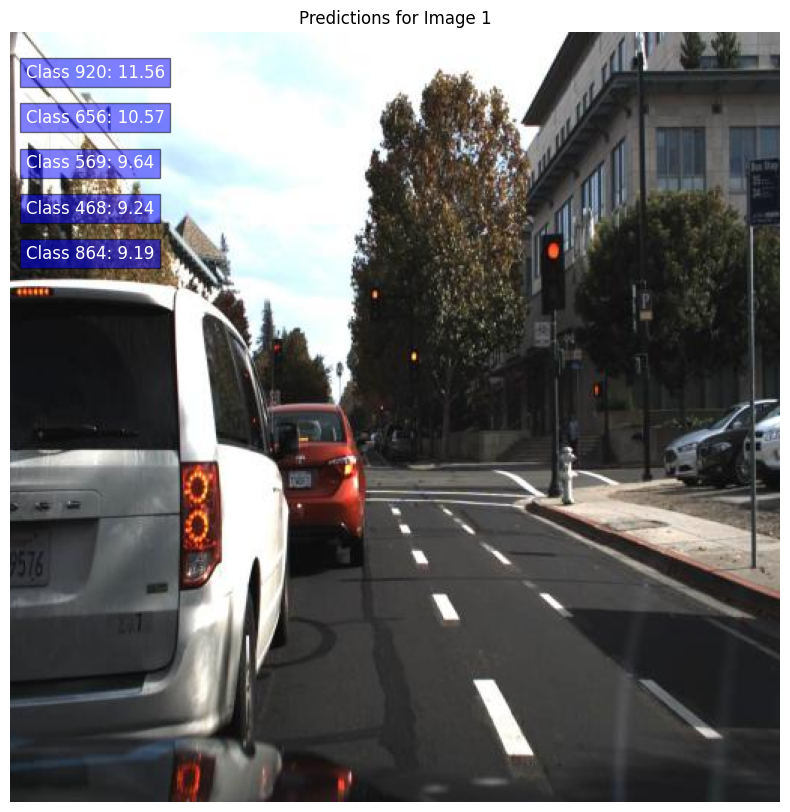

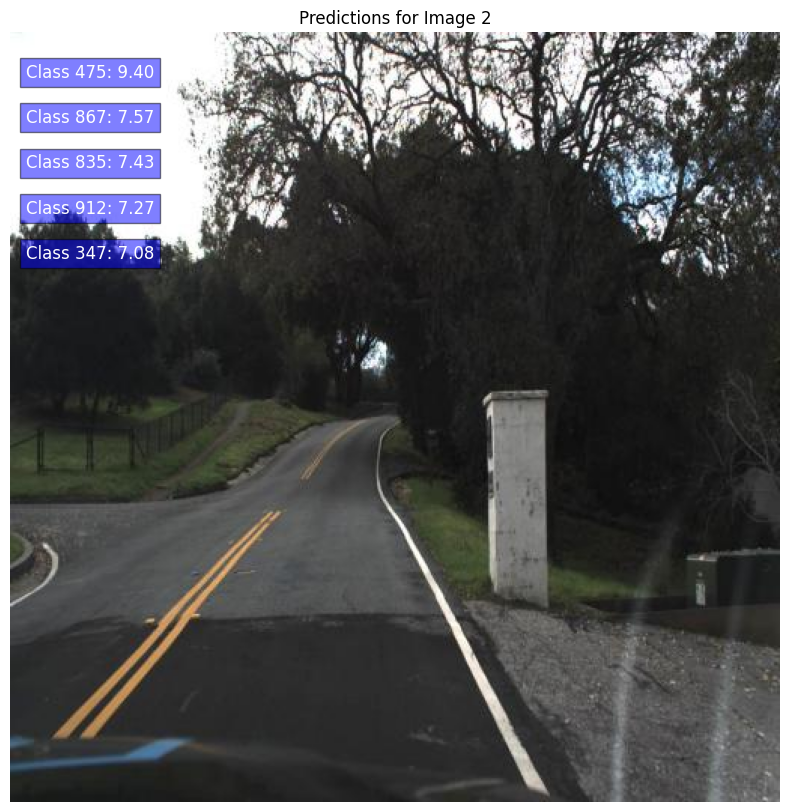

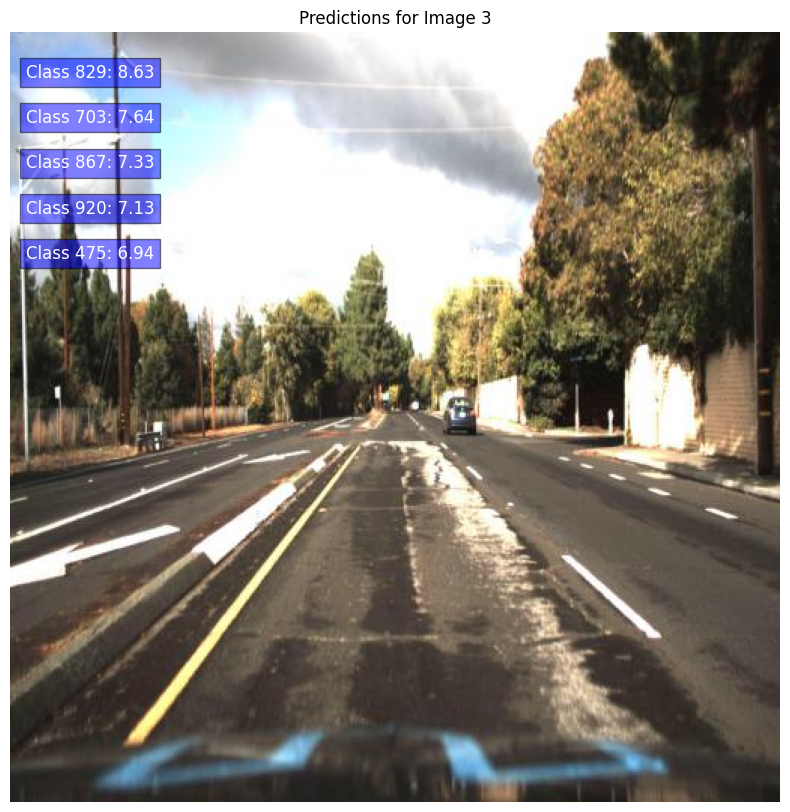

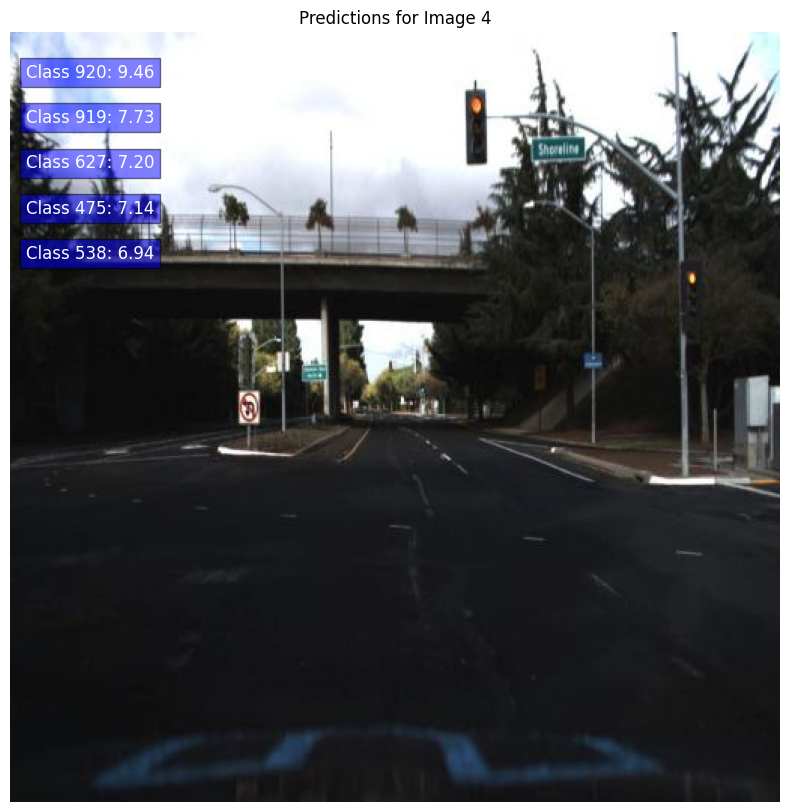

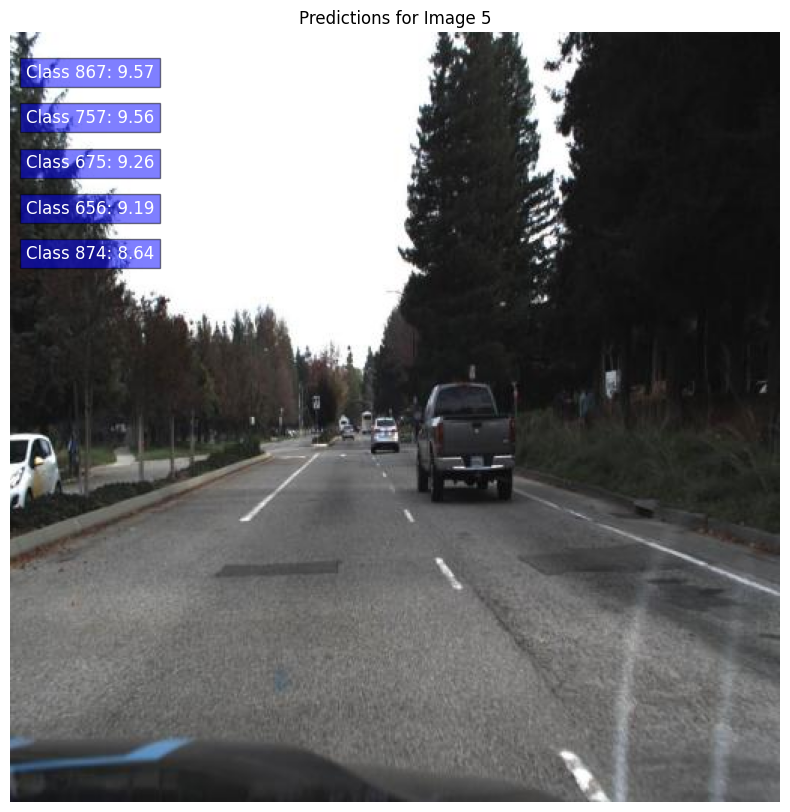

In [44]:
import os
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

# Define paths to validation images
val_images_dir = "/kaggle/working/export/val/images"
val_images = [os.path.join(val_images_dir, img) for img in os.listdir(val_images_dir)[:5]]

# Define preprocessing pipeline for images
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size expected by the model
    transforms.ToTensor(),         # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize as per ImageNet
])

# Run predictions and visualize
for i, img_path in enumerate(val_images):
    # Open image
    img = Image.open(img_path).convert("RGB")  # Ensure 3-channel RGB image

    # Preprocess the image
    input_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension (1, C, H, W)

    # Ensure input tensor is on the same device as the model
    input_tensor = input_tensor.to(next(model.parameters()).device)

    # Run inference on the image
    results = model(input_tensor)  # YOLO model inference (assuming classification)

    # Convert predictions to numpy for easier handling
    results_np = results.cpu().detach().numpy()

    # Plot the original image
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')

    # If the model provides classification output, display labels
    if len(results_np.shape) == 2:  # Assuming output is (batch_size, num_classes)
        top_classes = results_np[0].argsort()[-5:][::-1]  # Top 5 predictions
        labels = [f"Class {cls}: {results_np[0][cls]:.2f}" for cls in top_classes]

        for j, label in enumerate(labels):
            plt.text(
                10, 30 + j * 30, label, fontsize=12, color='white',
                bbox=dict(facecolor='blue', alpha=0.5)
            )
    else:
        # If the model is an object detection model but does not return structured boxes
        print("Check model output structure for bounding boxes and classes.")

    plt.title(f"Predictions for Image {i + 1}")
    plt.show()


In [143]:
import torch
from ultralytics import YOLO

# Load the YOLOv8 model
model_path = "/kaggle/working/yolov8n.pt"
model = YOLO(model_path)

# Print model summary
print(model.model)  # This will display the architecture of the YOLOv8 model.

# Calculate total trainable and non-trainable parameters
trainable_params = sum(p.numel() for p in model.model.parameters() if p.requires_grad)
non_trainable_params = sum(p.numel() for p in model.model.parameters() if not p.requires_grad)
total_params = trainable_params + non_trainable_params

print("\nModel Parameters:")
print(f"Trainable Parameters: {trainable_params:,}")
print(f"Non-Trainable Parameters: {non_trainable_params:,}")
print(f"Total Parameters: {total_params:,}")


DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
    

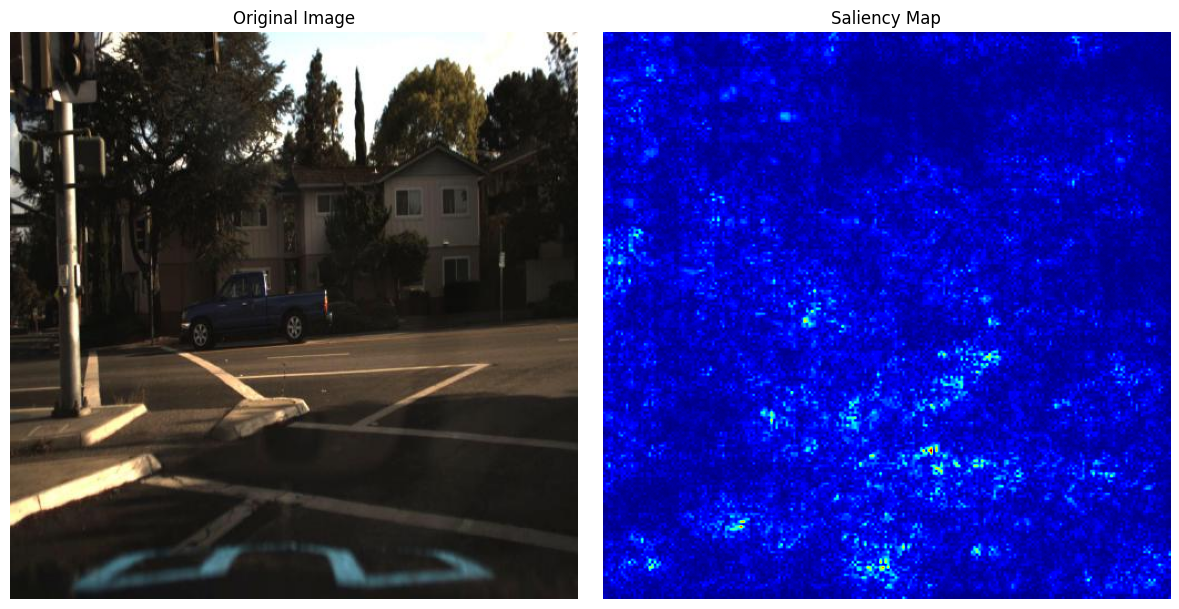

In [14]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision.models import resnet50

# Function to preprocess the image
def preprocess_image(image_path, image_size=224):
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(image_path).convert('RGB')
    return transform(image).unsqueeze(0), image

# Saliency Map Function
def generate_saliency_map(model, image_tensor, class_idx=None):
    model.eval()
    image_tensor.requires_grad_()  # Enable gradient tracking on the input image
    
    output = model(image_tensor)  # Forward pass
    
    # If no class index is provided, use the class with the highest score
    if class_idx is None:
        class_idx = torch.argmax(output)
    
    # Zero gradients and compute gradients with respect to the chosen class
    model.zero_grad()
    output[0, class_idx].backward()
    
    # Compute the absolute value of gradients and get the max channel
    saliency, _ = torch.max(image_tensor.grad.data.abs(), dim=1)
    return saliency[0].cpu().numpy()

# Display the Saliency Map
def display_saliency_map(original_image, saliency_map):
    plt.figure(figsize=(12, 6))
    
    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis('off')
    
    # Saliency Map
    plt.subplot(1, 2, 2)
    plt.imshow(saliency_map, cmap='jet')
    plt.title("Saliency Map")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Main Script
if __name__ == "__main__":
    # Load a pretrained model (ResNet50 as an example)
    model = resnet50(pretrained=True)
    
    # Path to the input image
    image_path = "/kaggle/input/retinanet/Self Driving Car/export/1478019978686299906_jpg.rf.bxnJeeEptGCrdAcL9zPM.jpg"  # Change this to your image path
    
    # Preprocess the image
    image_tensor, original_image = preprocess_image(image_path)
    
    # Generate the saliency map
    saliency_map = generate_saliency_map(model, image_tensor)
    
    # Display the results
    display_saliency_map(original_image, saliency_map)


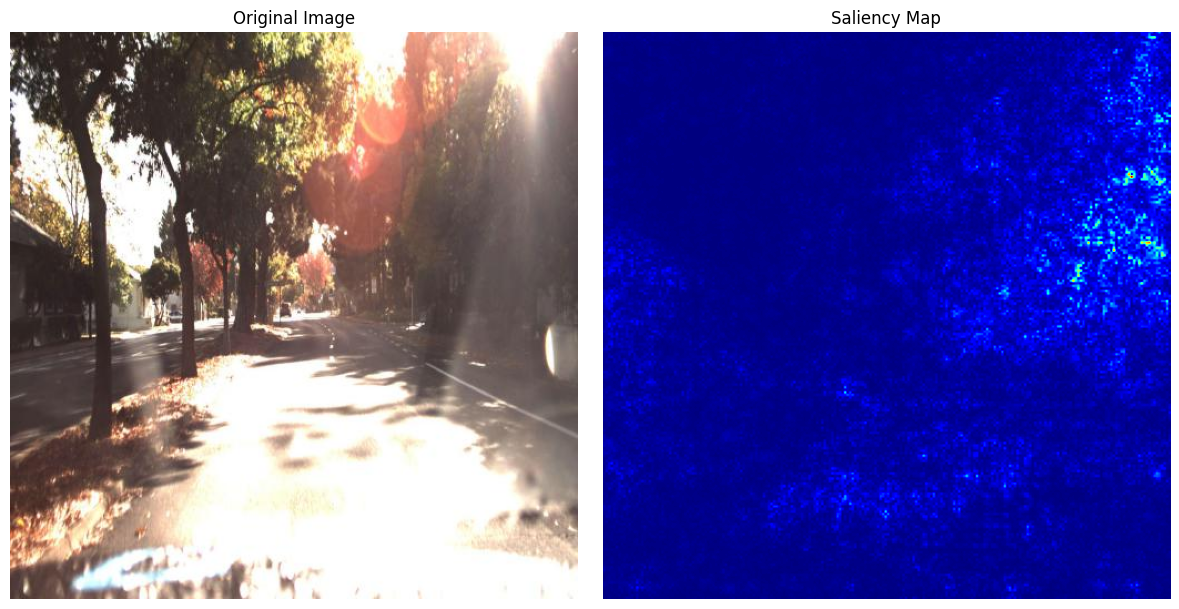

In [15]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision.models import resnet50

# Function to preprocess the image
def preprocess_image(image_path, image_size=224):
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(image_path).convert('RGB')
    return transform(image).unsqueeze(0), image

# Saliency Map Function
def generate_saliency_map(model, image_tensor, class_idx=None):
    model.eval()
    image_tensor.requires_grad_()  # Enable gradient tracking on the input image
    
    output = model(image_tensor)  # Forward pass
    
    # If no class index is provided, use the class with the highest score
    if class_idx is None:
        class_idx = torch.argmax(output)
    
    # Zero gradients and compute gradients with respect to the chosen class
    model.zero_grad()
    output[0, class_idx].backward()
    
    # Compute the absolute value of gradients and get the max channel
    saliency, _ = torch.max(image_tensor.grad.data.abs(), dim=1)
    return saliency[0].cpu().numpy()

# Display the Saliency Map
def display_saliency_map(original_image, saliency_map):
    plt.figure(figsize=(12, 6))
    
    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis('off')
    
    # Saliency Map
    plt.subplot(1, 2, 2)
    plt.imshow(saliency_map, cmap='jet')
    plt.title("Saliency Map")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Main Script
if __name__ == "__main__":
    # Load a pretrained model (ResNet50 as an example)
    model = resnet50(pretrained=True)
    
    # Path to the input image
    image_path = "/kaggle/input/retinanet/Self Driving Car/export/1478020200690374841_jpg.rf.KmwLgD8EYMttyH8e6oJC.jpg"  # Change this to your image path
    
    # Preprocess the image
    image_tensor, original_image = preprocess_image(image_path)
    
    # Generate the saliency map
    saliency_map = generate_saliency_map(model, image_tensor)
    
    # Display the results
    display_saliency_map(original_image, saliency_map)
